In [229]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import poisson ,binom,norm,t
import matplotlib
from matplotlib import pyplot  as plt
import pylab
from pylab import legend,plot,show,xlabel,ylabel,title
import seaborn as sns
from numpy import random





### libraries required for data analysis

In [3]:
df_app=pd.read_csv("application_data.csv")
df_app.count()

SK_ID_CURR                    307511
TARGET                        307511
NAME_CONTRACT_TYPE            307511
CODE_GENDER                   307511
FLAG_OWN_CAR                  307511
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     265992
AMT_REQ_CREDIT_BUREAU_WEEK    265992
AMT_REQ_CREDIT_BUREAU_MON     265992
AMT_REQ_CREDIT_BUREAU_QRT     265992
AMT_REQ_CREDIT_BUREAU_YEAR    265992
Length: 122, dtype: int64

### to read the (application_data) dataset in csv  format

In [4]:
df_app.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

### to see all columns in dataset

In [5]:
df_app.shape    

(307511, 122)

### to see count of rows and columns

In [6]:
pd.set_option('display.max_columns', None)
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [7]:
df_prev=pd.read_csv("previous_application.csv")

### TO READ (previous_application) DATASET IN CSV FORMAT

In [8]:
df_prev.shape

(1670214, 37)

### To see count of rows and columns

In [9]:
df_prev.columns.tolist()

['SK_ID_PREV',
 'SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

### TO SEEL ALL COLUMNS IN THE DATA SET

In [10]:
pd.set_option('display.max_columns', None)
df_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [194]:
pd.set_option('display.max_columns', None)
a=df_app.isnull().sum()
df_app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

## this information helps to remove unnecessary columns which not require 
## after removing other columns can help me to analyze  better 

In [191]:
df_app.info

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        

## this information gives the info about the table 

In [13]:
df_app.count()

SK_ID_CURR                    307511
TARGET                        307511
NAME_CONTRACT_TYPE            307511
CODE_GENDER                   307511
FLAG_OWN_CAR                  307511
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     265992
AMT_REQ_CREDIT_BUREAU_WEEK    265992
AMT_REQ_CREDIT_BUREAU_MON     265992
AMT_REQ_CREDIT_BUREAU_QRT     265992
AMT_REQ_CREDIT_BUREAU_YEAR    265992
Length: 122, dtype: int64

## gives count of the rows 

In [14]:
df_prev.count()

SK_ID_PREV                     1670214
SK_ID_CURR                     1670214
NAME_CONTRACT_TYPE             1670214
AMT_ANNUITY                    1297979
AMT_APPLICATION                1670214
AMT_CREDIT                     1670213
AMT_DOWN_PAYMENT                774370
AMT_GOODS_PRICE                1284699
WEEKDAY_APPR_PROCESS_START     1670214
HOUR_APPR_PROCESS_START        1670214
FLAG_LAST_APPL_PER_CONTRACT    1670214
NFLAG_LAST_APPL_IN_DAY         1670214
RATE_DOWN_PAYMENT               774370
RATE_INTEREST_PRIMARY             5951
RATE_INTEREST_PRIVILEGED          5951
NAME_CASH_LOAN_PURPOSE         1670214
NAME_CONTRACT_STATUS           1670214
DAYS_DECISION                  1670214
NAME_PAYMENT_TYPE              1670214
CODE_REJECT_REASON             1670214
NAME_TYPE_SUITE                 849809
NAME_CLIENT_TYPE               1670214
NAME_GOODS_CATEGORY            1670214
NAME_PORTFOLIO                 1670214
NAME_PRODUCT_TYPE              1670214
CHANNEL_TYPE             

df_prev.isnull().sum()

#  Removing unnecessary columns from the dataset

# Essential for Loan Default Analysis
 TARGET - The target variable (default or not).
 
 AMT_CREDIT - Total credit amount of the loan.
 
 AMT_ANNUITY - Loan repayment amount per period.
 
 AMT_GOODS_PRICE - Price of the goods related to the loan.
 
 AMT_INCOME_TOTAL - Total income of the applicant.

 NAME_CONTRACT_TYPE - Type of loan contract.
 
 CODE_GENDER - Gender of the applicant (helps identify demographic risk).
 
 FLAG_OWN_CAR, FLAG_OWN_REALTY - Indicates ownership of car/real estate (potential for collateral).
 
 CNT_CHILDREN - Number of children (financial dependency).
 
 NAME_INCOME_TYPE - Source of income (e.g., working, pensioner).
 
 NAME_EDUCATION_TYPE - Education level (affects financial literacy and stability).
 
 NAME_FAMILY_STATUS - Marital status (may affect risk of default).
 
 NAME_HOUSING_TYPE - Housing arrangement (own house vs rented).
 
 REGION_POPULATION_RELATIVE - Socioeconomic context of the region.
 
 DAYS_BIRTH - Age of the applicant (can create age-related features).
 
 DAYS_EMPLOYED - Employment duration (financial stability indicator).
 
 EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 - External risk scores (highly predictive).
 
 OCCUPATION_TYPE - Profession of the applicant (income stability).
 
 CNT_FAM_MEMBERS - Number of dependents (financial burden).
 
 LOAN_INCOME_RATIO (calculated) - Ratio of loan amount to income (risk indicator).

#  Columns to Keep in previous_application Dataset


#  Essential for Historical Loan Analysis

SK_ID_CURR - Links with the application dataset.

NAME_CONTRACT_TYPE - Type of previous loan (e.g., consumer loan, credit card).

AMT_APPLICATION, AMT_CREDIT, AMT_DOWN_PAYMENT - Loan amounts and down payment.

NAME_CONTRACT_STATUS - Status of previous applications (e.g., approved, refused).

DAYS_DECISION - Time since the decision on the previous application.

NAME_CASH_LOAN_PURPOSE - Purpose of the previous loan (categorical analysis).

CNT_PAYMENT - Number of installments.

RATE_DOWN_PAYMENT - Down payment as a percentage of the loan.

RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED - Interest rates (if available).

## Using the excel sheet of information found out that these columns are relevant.

In [15]:
# Columns to keep for analysis
application_keep = ['SK_ID_CURR',
    'TARGET', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
    'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
    'EXT_SOURCE_3', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'
]

previous_application_keep = [
    'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION', 'AMT_CREDIT', 
    'AMT_DOWN_PAYMENT', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 
    'NAME_CASH_LOAN_PURPOSE', 'CNT_PAYMENT', 'RATE_DOWN_PAYMENT'
]

# Dropping unnecessary columns
df_new_app= df_app[application_keep]
df_new_prev_appl = df_prev[previous_application_keep]

## keeping only those columns which are required for our analysis of Target column

In [16]:
df_new_app.head()    # checking first five values aafter filteration

SK_ID_CURR  TARGET  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0      100002       1    406597.5      24700.5         351000.0   
1      100003       0   1293502.5      35698.5        1129500.0   
2      100004       0    135000.0       6750.0         135000.0   
3      100006       0    312682.5      29686.5         297000.0   
4      100007       0    513000.0      21865.5         513000.0   

   AMT_INCOME_TOTAL NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0          202500.0         Cash loans           M            N   
1          270000.0         Cash loans           F            N   
2           67500.0    Revolving loans           M            Y   
3          135000.0         Cash loans           F            N   
4          121500.0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN NAME_INCOME_TYPE  \
0               Y             0          Working   
1               N             0    State servant   
2               Y             0          Working   
3               Y             0          Working   
4               Y             0          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  EXT_SOURCE_1  \
0                    0.018801       -9461           -637      0.083037   
1                    0.003541      -16765          -1188      0.311267   
2                    0.010032      -19046           -225           NaN   
3                    0.008019      -19005          -3039           NaN   
4                    0.028663      -19932          -3038           NaN   

   EXT_SOURCE_2  EXT_SOURCE_3 OCCUPATION_TYPE  CNT_FAM_MEMBERS  
0      0.262949      0.139376        Laborers              1.0  
1      0.622246           NaN      Core staff              2.0  
2      0.555912      0.729567        Laborers              1.0  
3      0.650442           NaN        Laborers              2.0  
4      0.322738           NaN      Core staff              1.0

In [17]:
df_new_app.shape    

(307511, 23)

## rows and columns in the new filter data_app

In [18]:
df_new_prev_appl.shape   # rows and columns in new filter_data

(1670214, 10)

In [19]:
df_new_app.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
AMT_INCOME_TOTAL                   0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
EXT_SOURCE_1                  173378
EXT_SOURCE_2                     660
EXT_SOURCE_3                   60965
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
dtype: int64

## to see the total null values in our filter (application_data)dataset

In [20]:
df_new_prev_appl.isnull().sum()

SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_DOWN_PAYMENT          895844
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_CASH_LOAN_PURPOSE         0
CNT_PAYMENT               372230
RATE_DOWN_PAYMENT         895844
dtype: int64

## to see the total null values in our filter (previous_application_data)dataset

In [21]:
numerical_columns = df_new_app.select_dtypes(include=['float64', 'int64']).columns
df_new_app[numerical_columns] = df_new_app[numerical_columns].fillna(df_new_app[numerical_columns].median())


C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\1574408166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_app[numerical_columns] = df_new_app[numerical_columns].fillna(df_new_app[numerical_columns].median())


## to fill Numerical Null  values using fillna method

In [23]:
df_new_app.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
AMT_INCOME_TOTAL                  0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
EXT_SOURCE_1                      0
EXT_SOURCE_2                      0
EXT_SOURCE_3                      0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   0
dtype: int64

# All null Numeric values are fill by taking median  of that column becaz our data set have chances of having extreme values
# and median doesnt affected by extreme values 
# now only one CATEGORICAL column is pending  which have nulll values

In [24]:
df_new_app.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

## Checking the total number of categories in the CATEGORICAL column so that we can replace null values by using them

In [25]:
df_new_app.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [26]:
occupation_distribution = df_new_app['OCCUPATION_TYPE'].value_counts(normalize=True)  #Calculates the proportion of each category in OCCUPATION_TYPE.
occupation_distribution*100

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64

 # Calculates the proportion of each category in OCCUPATION_TYPE.

In [27]:
missing_count = df_new_app.OCCUPATION_TYPE.isnull().sum()
missing_count      #COUNT OF MISSING VALUE IS 96391

96391

# #COUNT OF MISSING VALUE IS 96391

In [28]:
random_fill = np.random.choice(
    occupation_distribution.index, 
    size=missing_count, 
    p=occupation_distribution.values
)

## for Random filling null values in categorical data

In [29]:
random_fill

array(['Accountants', 'Accountants', 'Core staff', ..., 'Drivers',
       'Managers', 'Managers'], dtype=object)

In [30]:
df_new_app.loc[df_new_app['OCCUPATION_TYPE'].isnull(), 'OCCUPATION_TYPE'] = random_fill   

### filling null values

In [31]:
df_new_app.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 80397
Sales staff              46775
Core staff               40300
Managers                 30950
Drivers                  27139
High skill tech staff    16588
Accountants              14142
Medicine staff           12418
Security staff            9923
Cooking staff             8699
Cleaning staff            6765
Private service staff     3869
Low-skill Laborers        3008
Waiters/barmen staff      1963
Secretaries               1923
Realty agents             1075
HR staff                   800
IT staff                   777
Name: count, dtype: int64

## even after random filling Null values proportion in categories is kept same  are remain the Same

In [32]:
df_new_app['OCCUPATION_TYPE'].value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 26.144431
Sales staff              15.210838
Core staff               13.105222
Managers                 10.064681
Drivers                   8.825375
High skill tech staff     5.394279
Accountants               4.598860
Medicine staff            4.038230
Security staff            3.226876
Cooking staff             2.828842
Cleaning staff            2.199921
Private service staff     1.258166
Low-skill Laborers        0.978176
Waiters/barmen staff      0.638351
Secretaries               0.625343
Realty agents             0.349581
HR staff                  0.260153
IT staff                  0.252674
Name: proportion, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'IT staff'),
  Text(13, 0, 'Waiters/barmen staff'),
  Text(14, 0, 'Low-skill Laborers'),
  Text(15, 0, 'Realty agents'),
  Text(16, 0, 'Secretaries'),
  Text(17, 0, 'HR staff')])

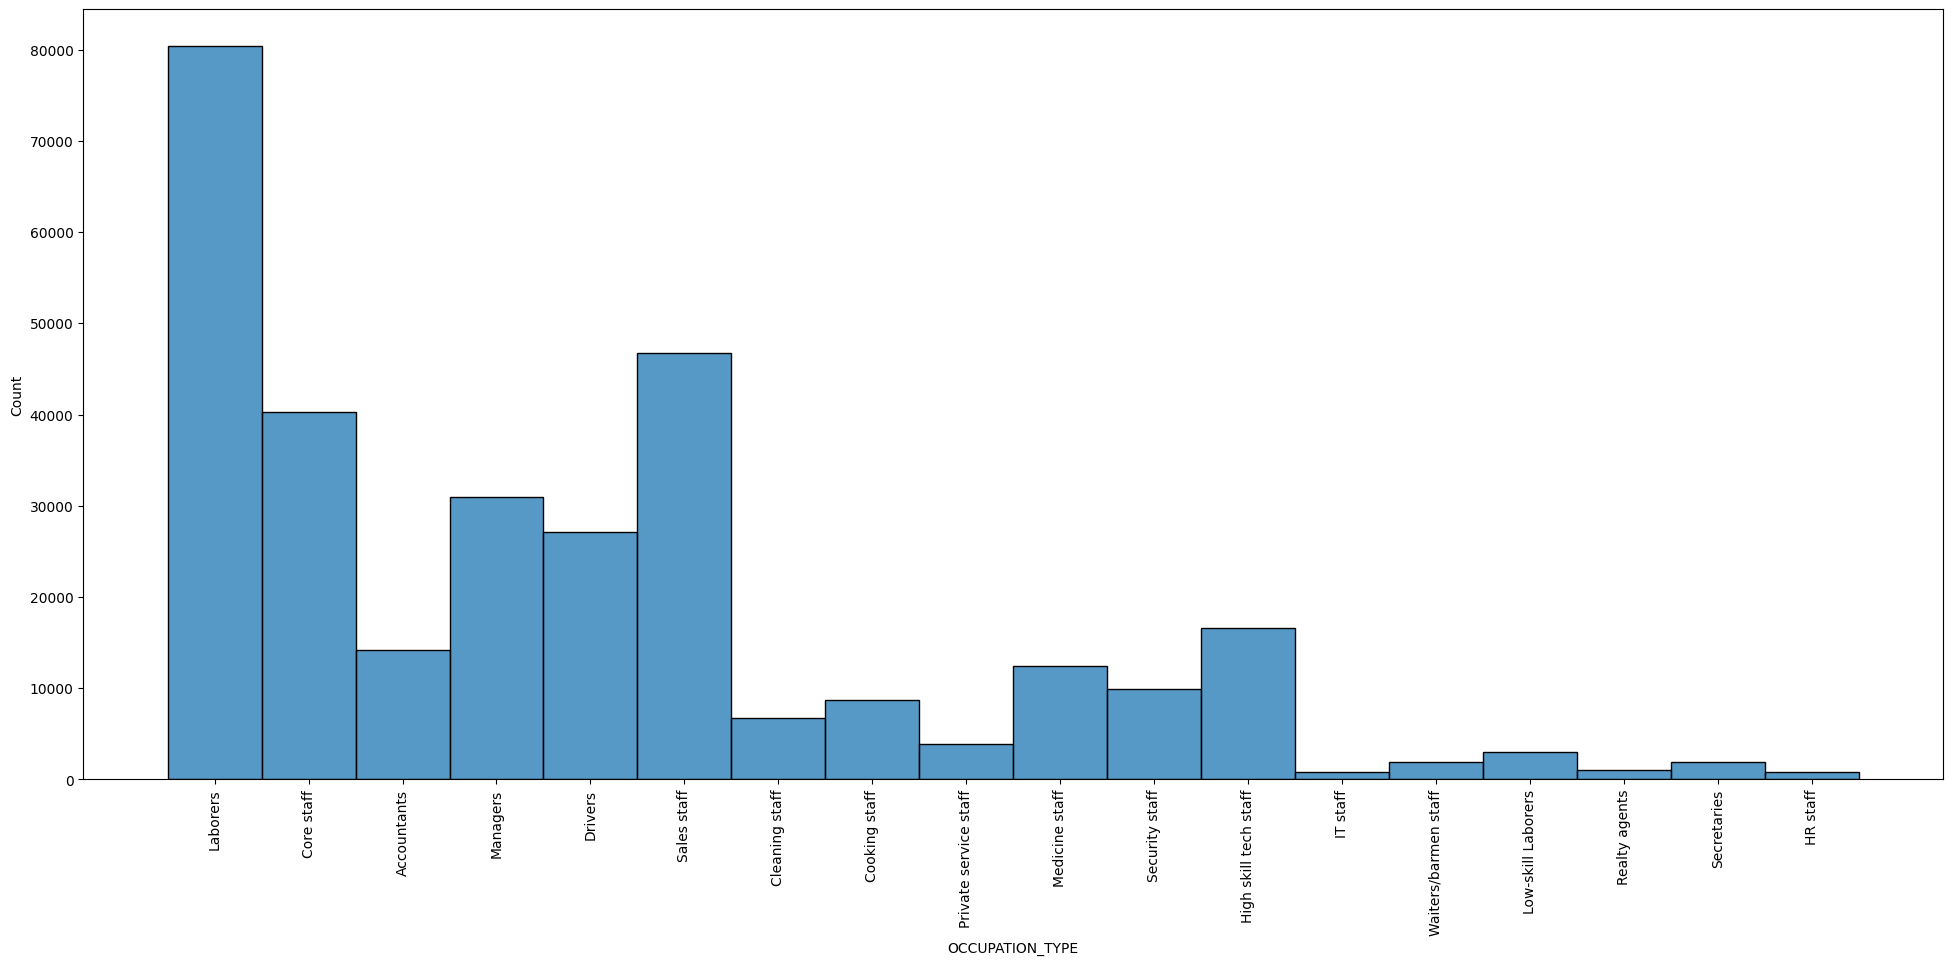

In [33]:
plt.figure(figsize=(24,10))
sns.histplot(df_new_app.OCCUPATION_TYPE)
plt.xticks(rotation=90)

## Showing the count of peoples with their Occupation applying for loan

<Axes: >

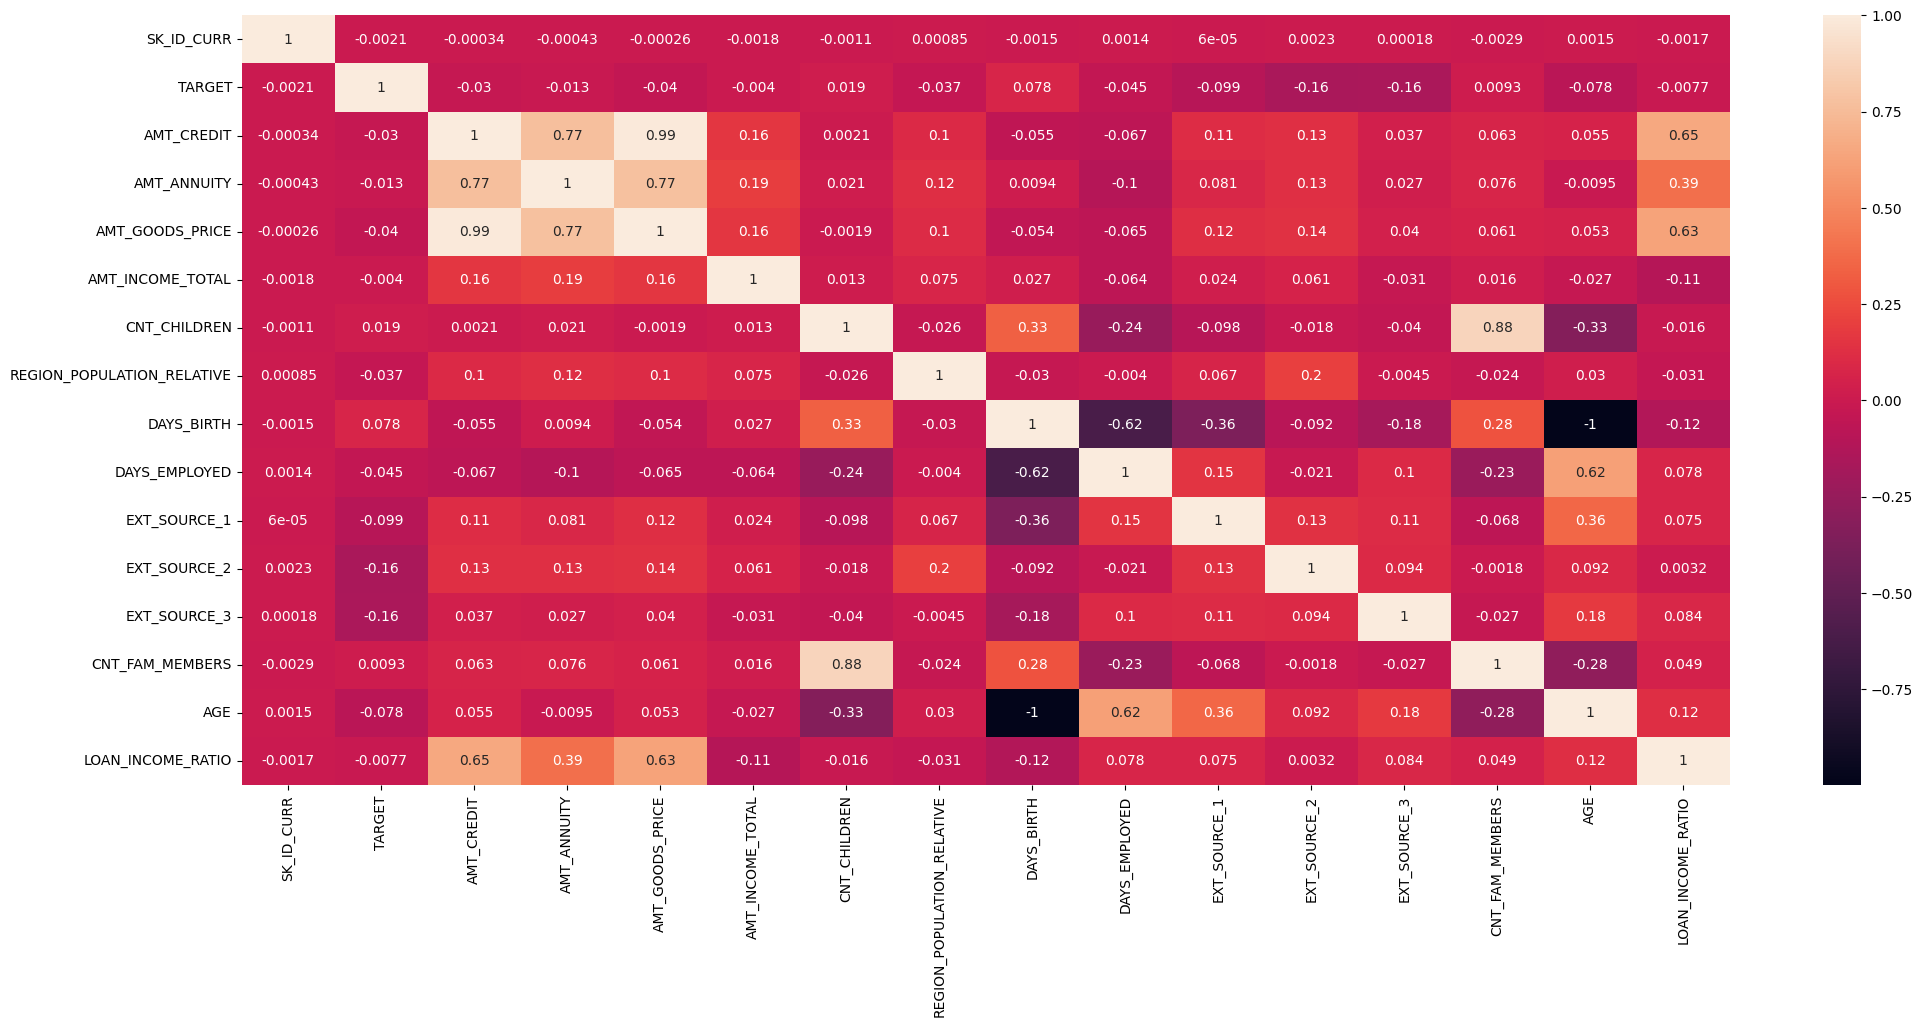

In [134]:
plt.figure(figsize=(24,10))
sns.heatmap(df_new_app.corr(numeric_only=True),annot=True)

## Trying to find the  cor-relation in datset but Heatmap is not showing any strong Relation

##### BIVARIANT ANALYSIS

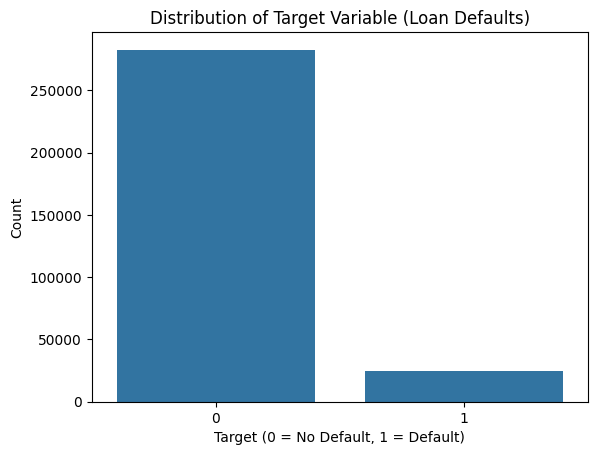

In [38]:
##  Distribution of the target variable (clients with payment difficulties)

sns.countplot(x=df_new_app.TARGET)
plt.title('Distribution of Target Variable (Loan Defaults)')
plt.xlabel('Target (0 = No Default, 1 = Default)')
plt.ylabel('Count')
plt.show()

## Count of default and non Default values in application data understading that their is hugh differce in their range

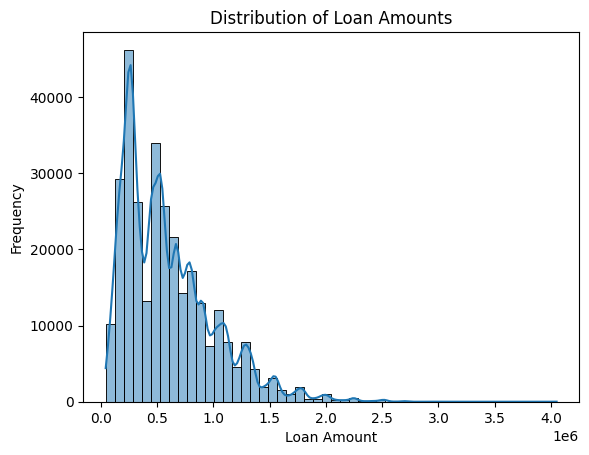

In [39]:
#  Distribution of loan amounts

sns.histplot(df_new_app['AMT_CREDIT'], kde=True, bins=50)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

## The distribution of loan amounts shows the typical range and frequency, helping to identify common and unusual borrowing behaviors. 


C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\235189272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_app['AGE'] =-df_new_app['DAYS_BIRTH'] / 365
C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\235189272.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_app['AGE'] =df_new_app['AGE'].astype(int,errors="ignore")


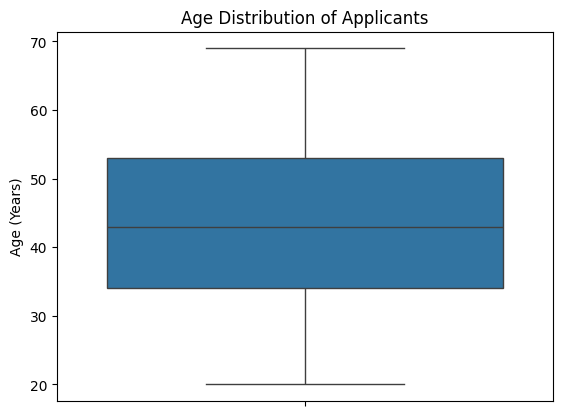

In [195]:
# . Boxplot of age (DAYS_BIRTH converted to years)

df_new_app['AGE'] =-df_new_app['DAYS_BIRTH'] / 365
df_new_app['AGE'] =df_new_app['AGE'].astype(int,errors="ignore")
sns.boxplot(y=df_new_app.AGE)
plt.title('Age Distribution of Applicants')
plt.ylabel('Age (Years)')
plt.show()

The box plot illustrates the age distribution of applicants, with a median age around 50 years.
The interquartile range spans from approximately 40 to 60 years, indicating that most applicants are concentrated within this range. Whiskers extend to the minimum and maximum ages, 
suggesting outliers may exist outside the 20 to 70 years span.

#  Loan-to-income ratio


C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\2412694989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_app['LOAN_INCOME_RATIO'] = df_new_app['AMT_CREDIT'] / df_new_app['AMT_INCOME_TOTAL']


Text(0, 0.5, 'Frequency')

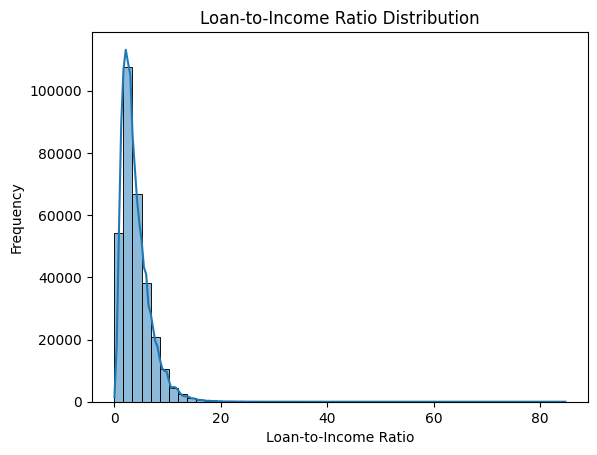

In [71]:

df_new_app['LOAN_INCOME_RATIO'] = df_new_app['AMT_CREDIT'] / df_new_app['AMT_INCOME_TOTAL']
sns.histplot(df_new_app['LOAN_INCOME_RATIO'], kde=True, bins=50)
plt.title('Loan-to-Income Ratio Distribution')
plt.xlabel('Loan-to-Income Ratio')
plt.ylabel('Frequency')

 The histogram of the Loan-to-Income Ratio shows a right-skewed distribution, with a significant concentration of values near zero. 
 As the ratio increases, the frequency of occurrences sharply declines, indicating that most borrowers maintain a relatively low loan-to-income ratio.
The presence of a few high values suggests potential outliers.

#### Bivariate Analysis


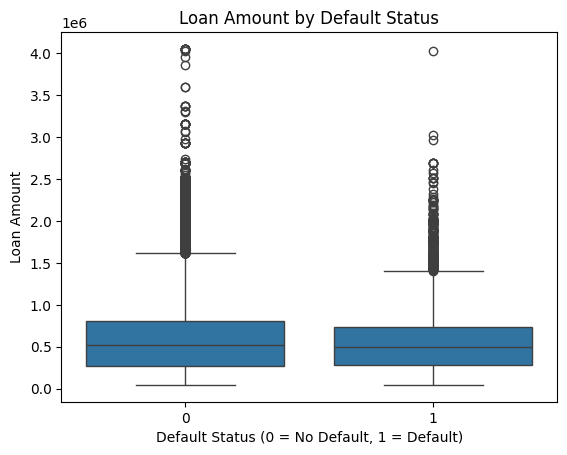

In [98]:
# 6. Target variable vs Loan Amount
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=df_new_app)
plt.title('Loan Amount by Default Status')
plt.xlabel('Default Status (0 = No Default, 1 = Default)')
plt.ylabel('Loan Amount')
plt.show()

The box plot reveals that both default and non-default borrowers tend to take out similar median loan amounts, around 500,000. However, there is a noticeable presence of outliers in both categories, suggesting that higher loan amounts may carry an increased risk of default.

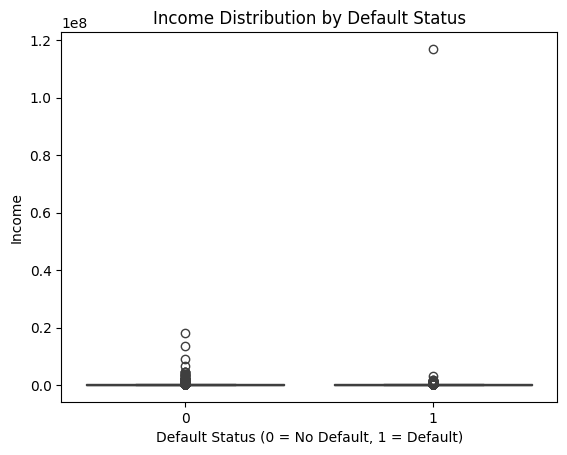

In [110]:
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df_new_app)
plt.title('Income Distribution by Default Status')
plt.xlabel('Default Status (0 = No Default, 1 = Default)')
plt.ylabel('Income')
plt.show()


The box plot illustrates the income distribution for borrowers with and without default status, showing a concentration of incomes near zero for both groups. While there are some outliers on the higher end, 
 it appears that a significant portion of those who default (1) have incomes similar to those without default (0), 
 suggesting that income alone may not be a robust indicator of default risk in this dataset.

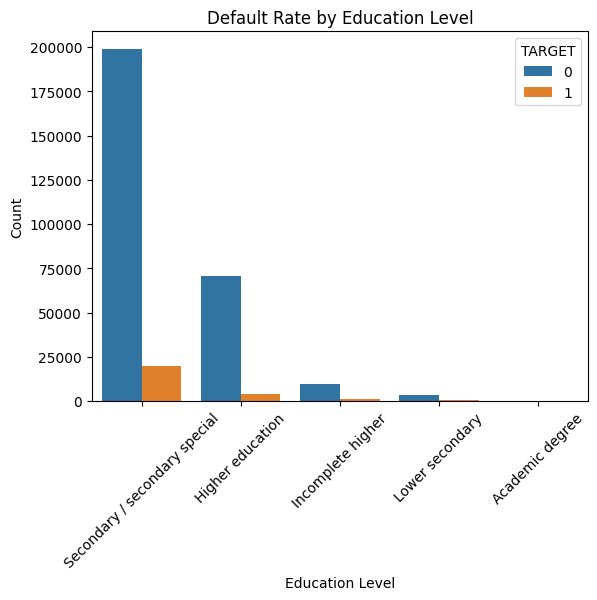

In [96]:
sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=df_new_app)
plt.title('Default Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### The chart shows that borrowers with secondary or secondary special education have the highest number of defaults, while those with higher education experience significantly fewer defaults.
#### This indicates that higher education may correlate with a lower risk of loan default.

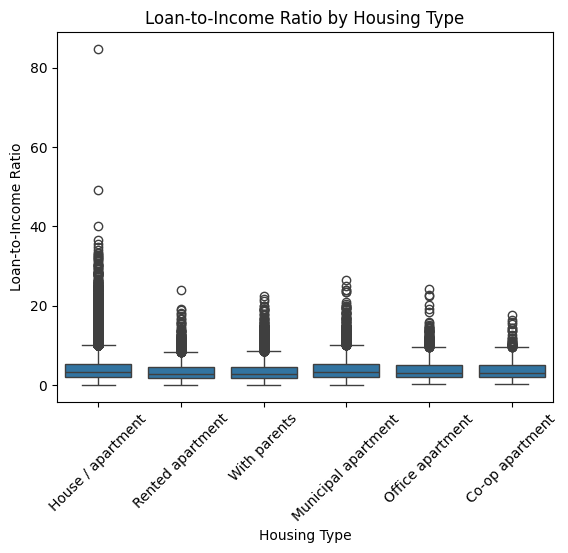

In [99]:
sns.boxplot(x='NAME_HOUSING_TYPE', y='LOAN_INCOME_RATIO', data=df_new_app)
plt.title('Loan-to-Income Ratio by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Loan-to-Income Ratio')
plt.xticks(rotation=45)
plt.show()

 The box plot displays the Loan-to-Income Ratio across different housing types, revealing that borrowers living in a "House/apartment" have the highest and most variable loan-to-income ratios, with numerous outliers.
 In contrast, other housing types like "Rented apartment" and "With parents" show much lower ratios and less variability
 suggesting that those in traditional housing situations may take on larger loans relative to their income, which could indicate higher risk profiles.

#### Multivarient analysis

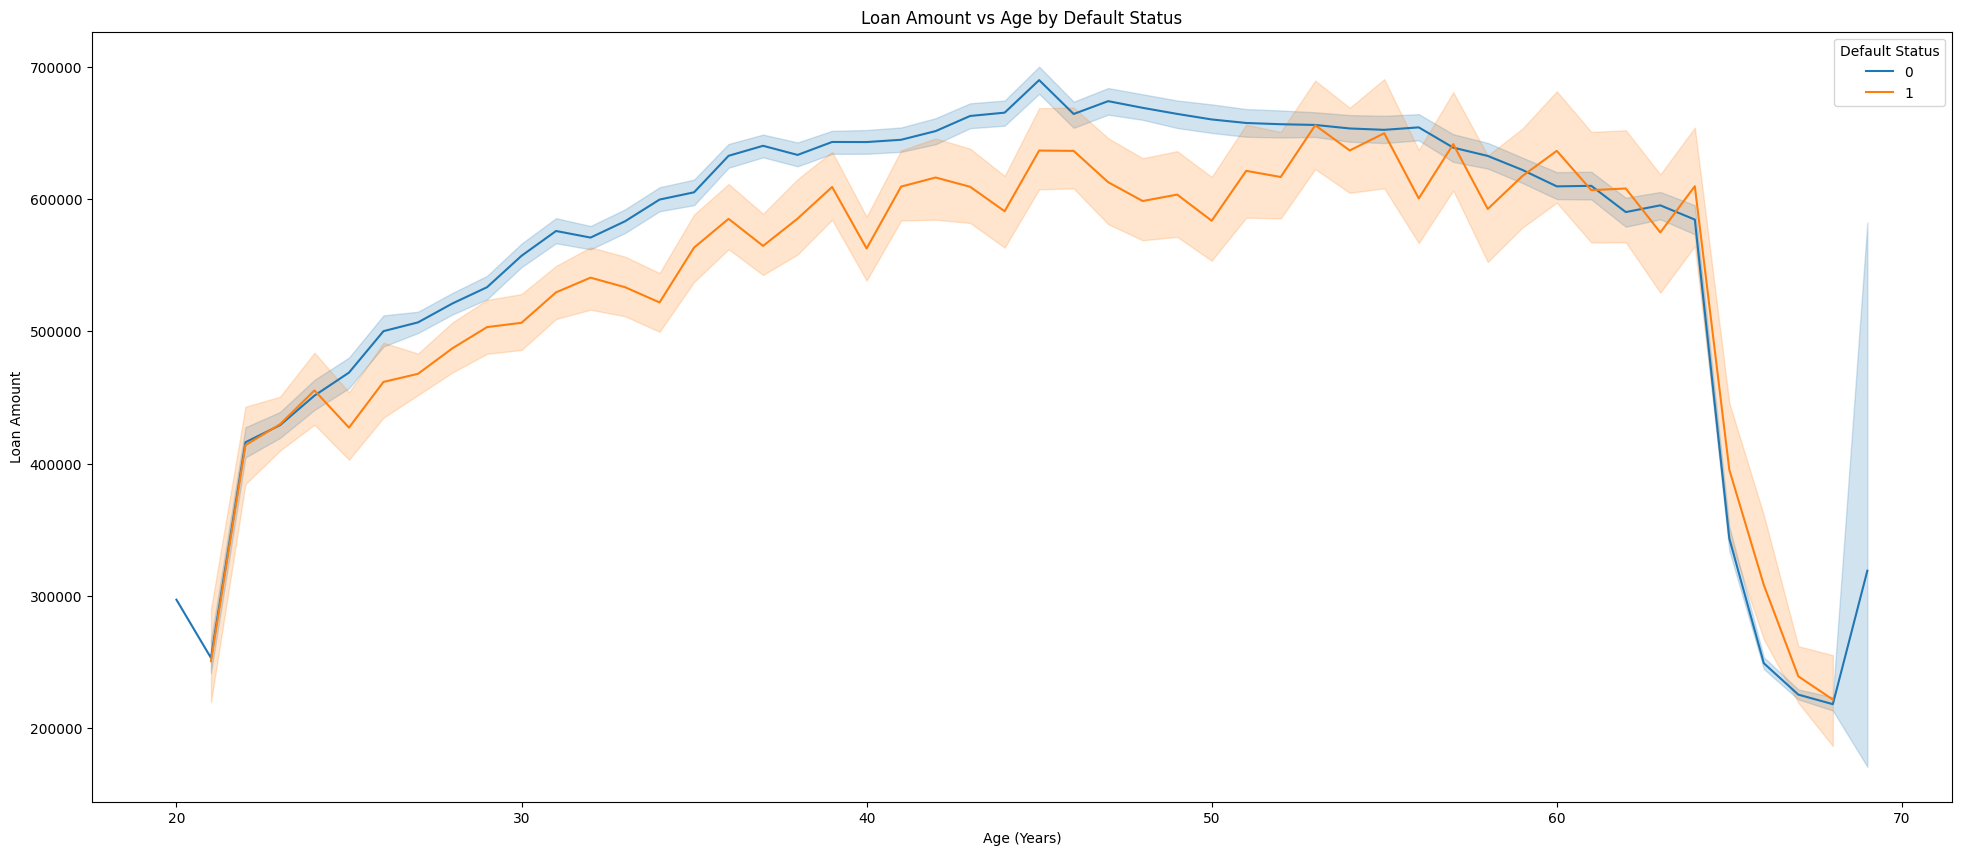

In [104]:
plt.figure(figsize=(24,10))
sns.lineplot(x='AGE', y='AMT_CREDIT', hue='TARGET', data=df_new_app)
plt.title('Loan Amount vs Age by Default Status')
plt.xlabel('Age (Years)')
plt.ylabel('Loan Amount')
plt.legend(title='Default Status', loc='upper right')


 The line chart shows that the average loan amount increases with age for both defaulting (orange) and non-defaulting (blue) borrowers, with non-defaulting borrowers consistently taking out higher loans. 
 Notably, there’s a significant decline in loan amounts for older borrowers (60+), particularly among those who default, suggesting increased financial caution or reduced borrowing capacity as age increases.

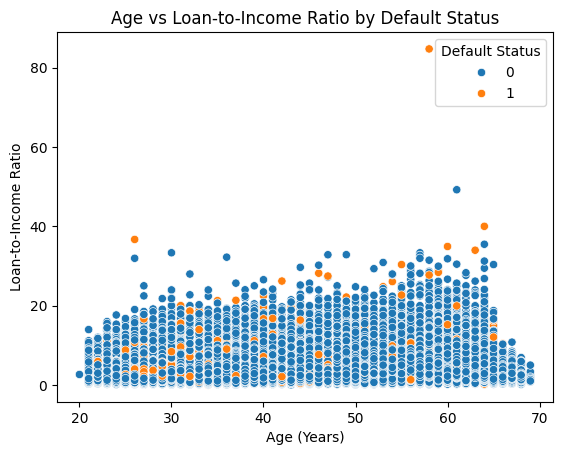

In [111]:
# 11. Age vs Loan-to-Income Ratio by Default Status

sns.scatterplot(x='AGE', y='LOAN_INCOME_RATIO', hue='TARGET', data=df_new_app)
plt.title('Age vs Loan-to-Income Ratio by Default Status')
plt.xlabel('Age (Years)')
plt.ylabel('Loan-to-Income Ratio')
plt.legend(title='Default Status', loc='upper right')
plt.show()

The scatter plot illustrates the relationship between age and loan-to-income ratio, highlighting that older borrowers (ages 50-60) tend to have higher loan-to-income ratios, with a noticeable concentration of defaults (orange dots). However, defaults remain relatively low across all ages, suggesting that while older borrowers may take on more debt relative to income,
## the overall risk of default does not increase significantly with age

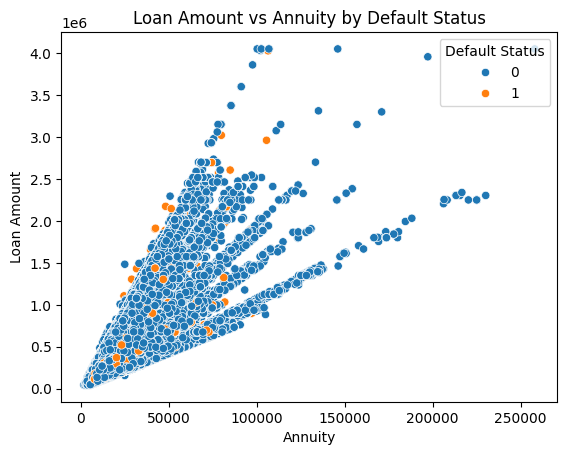

In [113]:
. Loan Amount vs Annuity by Default Status
sns.scatterplot(x='AMT_ANNUITY', y='AMT_CREDIT', hue='TARGET', data=df_new_app)
plt.title('Loan Amount vs Annuity by Default Status')
plt.xlabel('Annuity')
plt.ylabel('Loan Amount')
plt.legend(title='Default Status', loc='upper right')
plt.show()

The scatter plot shows that non-defaulting borrowers (blue) tend to have higher loan amounts and annuities compared to defaulting borrowers (orange), who are mostly concentrated at lower values. This indicates that higher loan amounts are generally associated with a lower risk of default, although some defaults occur among higher loan amounts,
## suggesting that other factors also influence default risk.

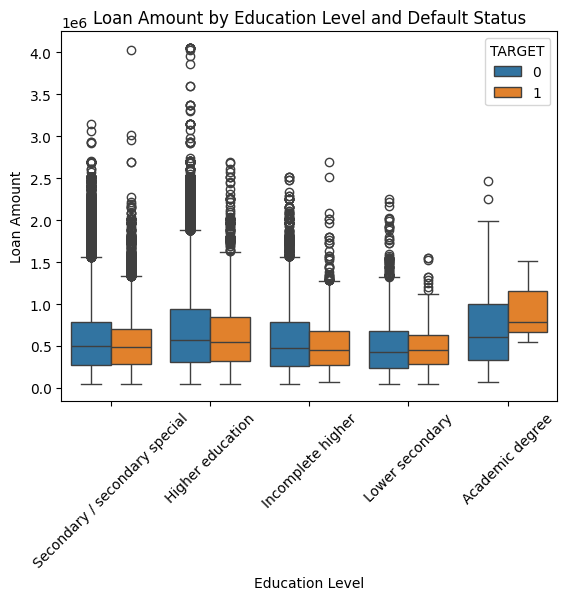

In [114]:
# 14. Education Level vs Loan Amount vs Default Status

sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue='TARGET', data=df_new_app)
plt.title('Loan Amount by Education Level and Default Status')
plt.xlabel('Education Level')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

 The box plot displays loan amounts stratified by education level and default status. Borrowers with "Higher education" tend to have the highest loan amounts, with a significant number of outliers. Defaulting borrowers (orange) generally have lower median loan amounts compared to non-defaulters (blue) across all education levels. "Academic degree" holders show the lowest defaults and a higher spread in loan amounts, while those with "Incomplete higher" and "Lower secondary" education levels exhibit higher default rates despite lower median loans.
## This suggests that higher education correlates with reduced default risk and higher borrowing capacity.

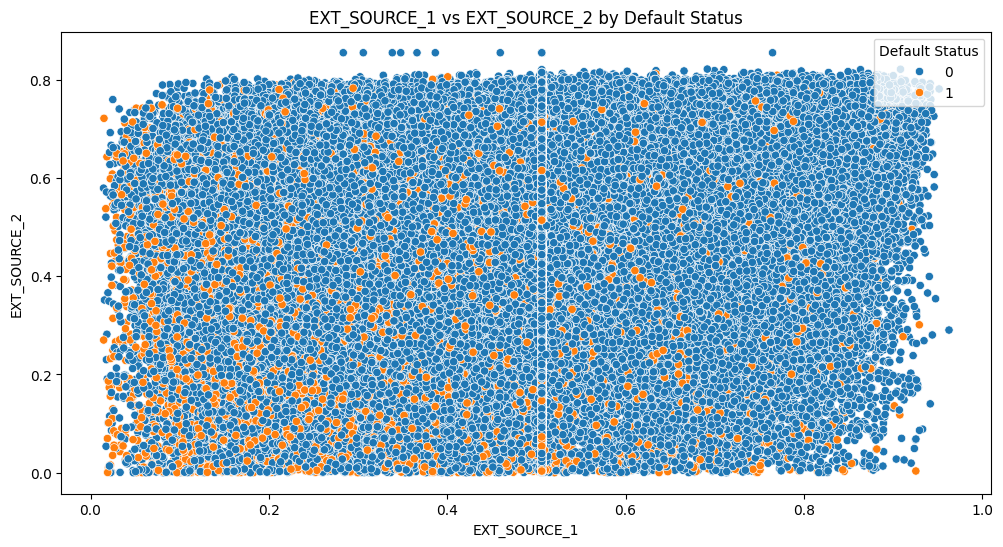

In [118]:
 EXT_SOURCE_1 vs EXT_SOURCE_2 by Default Status
plt.figure(figsize=(12, 6))
sns.scatterplot(x='EXT_SOURCE_1', y='EXT_SOURCE_2', hue='TARGET', data=df_new_app)
plt.title('EXT_SOURCE_1 vs EXT_SOURCE_2 by Default Status')
plt.xlabel('EXT_SOURCE_1')
plt.ylabel('EXT_SOURCE_2')
plt.legend(title='Default Status', loc='upper right')
plt.show()

The scatter plot compares EXT_SOURCE_1 and EXT_SOURCE_2 based on default status. The majority of points (in blue) indicate non-defaulting borrowers,
while defaulting borrowers (orange points) are scattered across both EXT_SOURCE values. There is no clear clustering of defaults in any specific region,
## suggesting that neither EXT_SOURCE_1 nor EXT_SOURCE_2 alone is a strong predictor of default risk in this dataset.

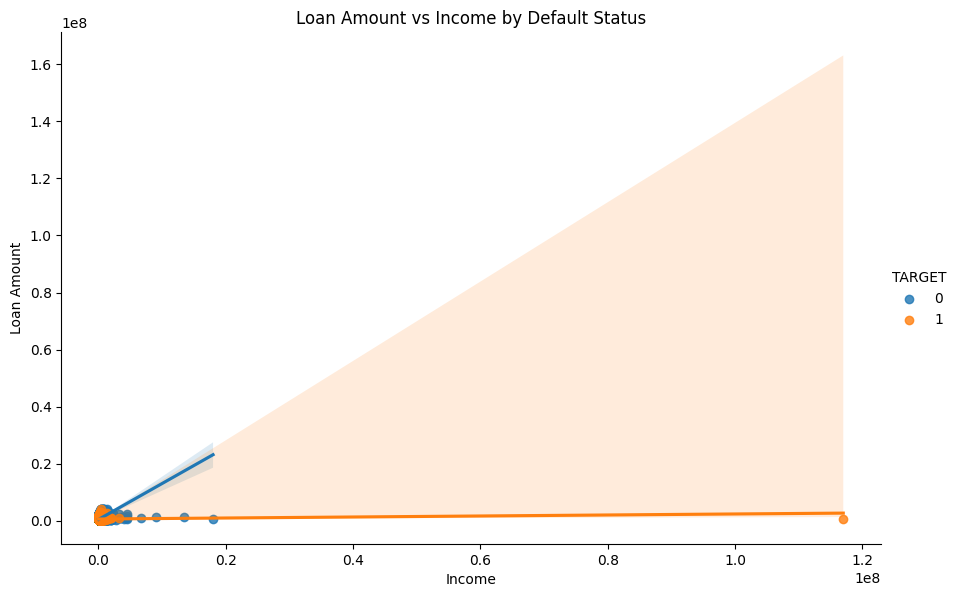

In [122]:
# 12. Loan Amount vs Income vs Default Status
sns.lmplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', hue='TARGET', data=df_new_app, height=6, aspect=1.5)
plt.title('Loan Amount vs Income by Default Status')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()

## The plot shows that non-defaulting borrowers (blue) have higher loan amounts associated with higher income, while defaulting borrowers (orange) cluster at lower incomes and loan amounts. This indicates a positive correlation between income and loan amount, suggesting that higher income reduces default risk. Overall, income is a significant predictor of loan performance.

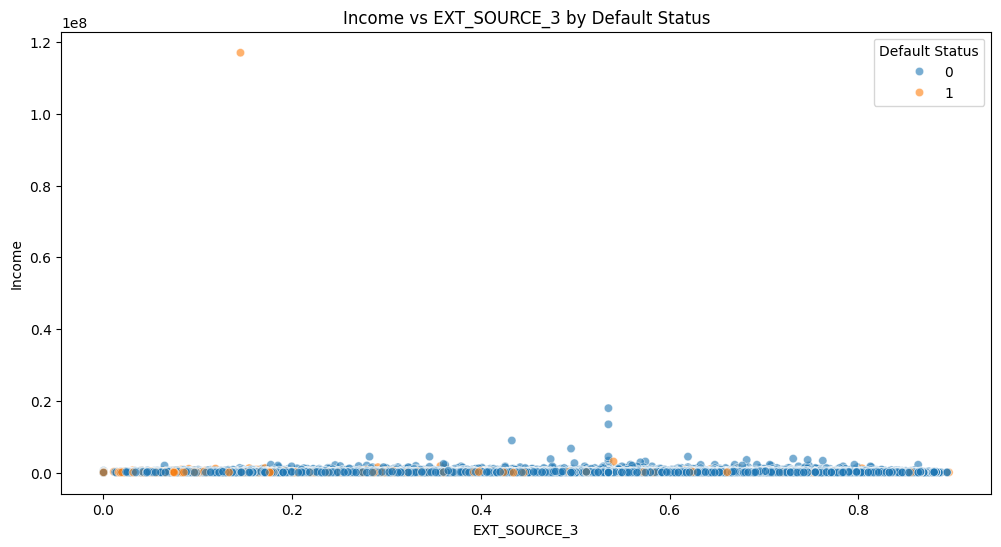

In [120]:
#  Income vs EXT_SOURCE_3 by Default Status
plt.figure(figsize=(12, 6))
sns.scatterplot(x='EXT_SOURCE_3', y='AMT_INCOME_TOTAL', hue='TARGET', data=df_new_app, alpha=0.6)
plt.title('Income vs EXT_SOURCE_3 by Default Status')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('Income')
plt.legend(title='Default Status', loc='upper right')
plt.show()

The scatter plot shows that non-defaulting borrowers (blue) dominate at lower values of EXT_SOURCE_3 and income, with few defaults (orange) scattered throughout. Most data points indicate low income levels, 
## suggesting that higher EXT_SOURCE_3 values do not significantly correlate with income or default status. Overall, income appears largely uniform across both groups with minimal differentiation in default risk.

In [115]:
# Client with defaulter 
df_curent_target_1 = df_new_app[df_new_app['TARGET']==1]

# Client with not a defaulter 
df_curent_target_0 = df_new_app[df_new_app['TARGET']==0]

## SPLITING THE DATA SET INTO TWO TO GET SOME MORE REALTION

In [116]:
df_curent_target_0

SK_ID_CURR  TARGET  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1           100003       0   1293502.5      35698.5        1129500.0   
2           100004       0    135000.0       6750.0         135000.0   
3           100006       0    312682.5      29686.5         297000.0   
4           100007       0    513000.0      21865.5         513000.0   
5           100008       0    490495.5      27517.5         454500.0   
...            ...     ...         ...          ...              ...   
307505      456249       0    225000.0      22050.0         225000.0   
307506      456251       0    254700.0      27558.0         225000.0   
307507      456252       0    269550.0      12001.5         225000.0   
307508      456253       0    677664.0      29979.0         585000.0   
307510      456255       0    675000.0      49117.5         675000.0   

        AMT_INCOME_TOTAL NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1               270000.0         Cash loans           F            N   
2                67500.0    Revolving loans           M            Y   
3               135000.0         Cash loans           F            N   
4               121500.0         Cash loans           M            N   
5                99000.0         Cash loans           M            N   
...                  ...                ...         ...          ...   
307505          112500.0         Cash loans           F            N   
307506          157500.0         Cash loans           M            N   
307507           72000.0         Cash loans           F            N   
307508          153000.0         Cash loans           F            N   
307510          157500.0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN      NAME_INCOME_TYPE  \
1                    N             0         State servant   
2                    Y             0               Working   
3                    Y             0               Working   
4                    Y             0               Working   
5                    Y             0         State servant   
...                ...           ...                   ...   
307505               Y             0             Pensioner   
307506               N             0               Working   
307507               Y             0             Pensioner   
307508               Y             0               Working   
307510               N             0  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
5       Secondary / secondary special               Married   
...                               ...                   ...   
307505  Secondary / secondary special  Single / not married   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
5       House / apartment                    0.035792      -16941   
...                   ...                         ...         ...   
307505  House / apartment                    0.022800      -24384   
307506       With parents                    0.032561       -9327   
307507  House / apartment                    0.025164      -20775   
307508  House / apartment                    0.005002      -14966   
307510  House / a

In [117]:
len(df_curent_target_1),len(df_curent_target_0)

(24825, 282686)

In [75]:
df_curent_target_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282686 entries, 1 to 307510
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  282686 non-null  int64  
 1   TARGET                      282686 non-null  int64  
 2   AMT_CREDIT                  282686 non-null  float64
 3   AMT_ANNUITY                 282686 non-null  float64
 4   AMT_GOODS_PRICE             282686 non-null  float64
 5   AMT_INCOME_TOTAL            282686 non-null  float64
 6   NAME_CONTRACT_TYPE          282686 non-null  object 
 7   CODE_GENDER                 282686 non-null  object 
 8   FLAG_OWN_CAR                282686 non-null  object 
 9   FLAG_OWN_REALTY             282686 non-null  object 
 10  CNT_CHILDREN                282686 non-null  int64  
 11  NAME_INCOME_TYPE            282686 non-null  object 
 12  NAME_EDUCATION_TYPE         282686 non-null  object 
 13  NAME_FAMILY_STATUS 

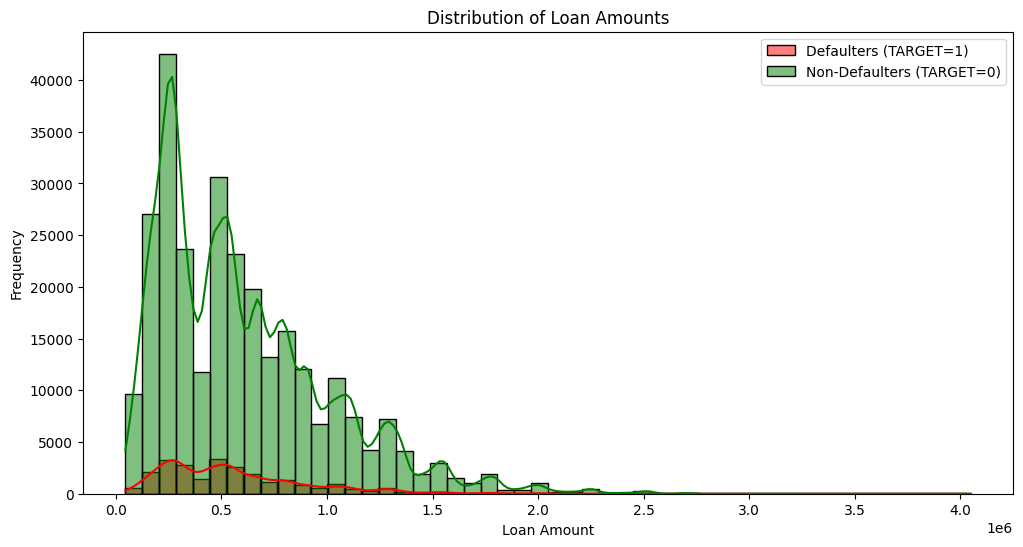

In [76]:
# 1. Distribution of Loan Amounts for Defaulters and Non-Defaulters
plt.figure(figsize=(12, 6))
sns.histplot(df_curent_target_1['AMT_CREDIT'], kde=True, bins=50, color='red', label='Defaulters (TARGET=1)')
sns.histplot(df_curent_target_0['AMT_CREDIT'], kde=True, bins=50, color='green', label='Non-Defaulters (TARGET=0)')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


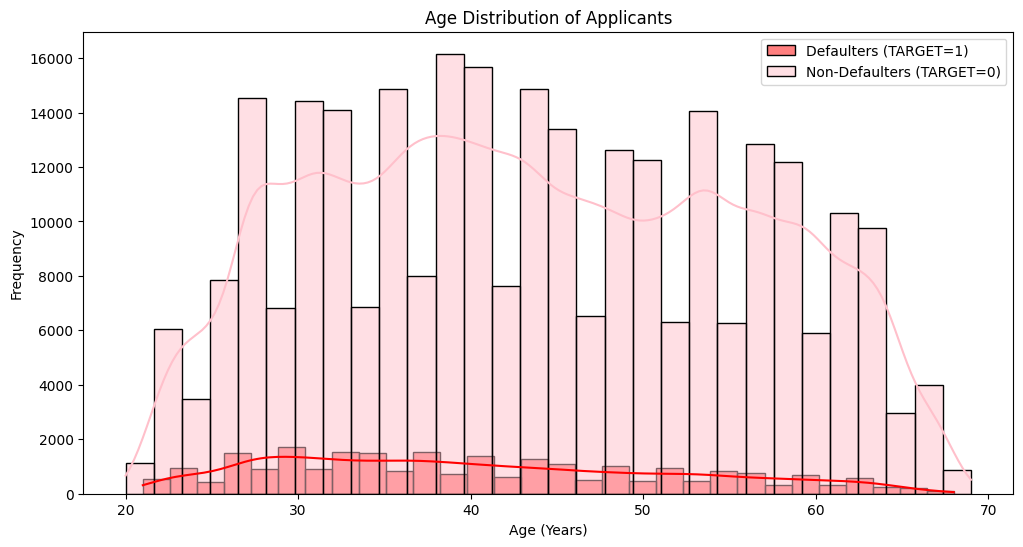

In [88]:
# 2. Age Distribution for Defaulters and Non-Defaulters
plt.figure(figsize=(12, 6))
sns.histplot(df_curent_target_1['AGE'], kde=True, bins=30, color='red', label='Defaulters (TARGET=1)')
sns.histplot(df_curent_target_0['AGE'], kde=True, bins=30, color='pink', label='Non-Defaulters (TARGET=0)')
plt.title('Age Distribution of Applicants')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

 The distribution of loan amounts indicates that non-defaulters (green) dominate at lower loan amounts, with a significant drop-off as amounts increase.
## In contrast, defaulters (red) are concentrated primarily in the lower range, suggesting higher default rates among smaller loans. Overall, the data reveals a lower frequency of defaults as loan amounts increase

# 3. Income Distribution for Defaulters and Non-Defaulters
plt.figure(figsize=(12, 6))
sns.histplot(df_curent_target_1['AMT_INCOME_TOTAL'], kde=True,  color='red', label='Defaulters (TARGET=1)')
sns.histplot(df_curent_target_0['AMT_INCOME_TOTAL'], kde=True,  color='green', label='Non-Defaulters (TARGET=0)')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()


The income distribution graph shows that the majority of non-defaulters (green) are clustered at lower income levels, while defaulters (red) are minimal across all income ranges. Most incomes are concentrated near zero, indicating a high frequency of low-income borrowers. This suggests a strong correlation between low income and higher default rate

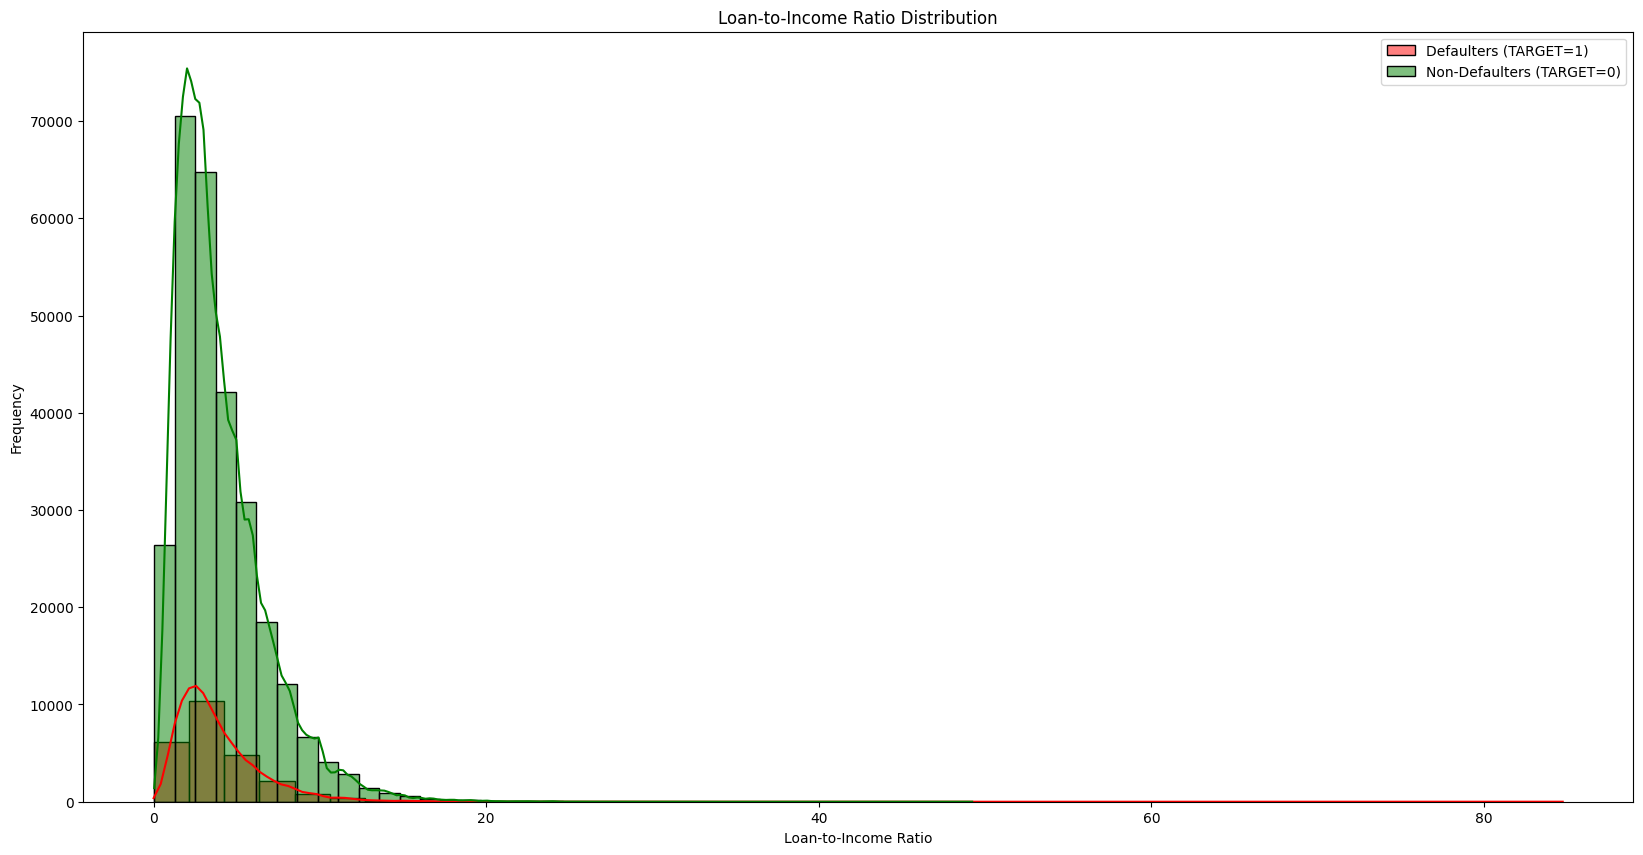

In [86]:
# 4. Loan-to-Income Ratio Distribution
plt.figure(figsize=(20, 10))
sns.histplot(df_curent_target_1['LOAN_INCOME_RATIO'], kde=True, bins=40, color='red', label='Defaulters (TARGET=1)')
sns.histplot(df_curent_target_0['LOAN_INCOME_RATIO'], kde=True, bins=40, color='green', label='Non-Defaulters (TARGET=0)')
plt.title('Loan-to-Income Ratio Distribution')
plt.xlabel('Loan-to-Income Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The income distribution graph shows that non-defaulters (green) significantly outnumber defaulters (red), particularly at lower income levels. Most data is concentrated near zero, indicating a prevalence of low-income borrowers. 
## This suggests a strong correlation between low income and higher default risk.



In [124]:
df_curent_target_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282686 entries, 1 to 307510
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  282686 non-null  int64  
 1   TARGET                      282686 non-null  int64  
 2   AMT_CREDIT                  282686 non-null  float64
 3   AMT_ANNUITY                 282686 non-null  float64
 4   AMT_GOODS_PRICE             282686 non-null  float64
 5   AMT_INCOME_TOTAL            282686 non-null  float64
 6   NAME_CONTRACT_TYPE          282686 non-null  object 
 7   CODE_GENDER                 282686 non-null  object 
 8   FLAG_OWN_CAR                282686 non-null  object 
 9   FLAG_OWN_REALTY             282686 non-null  object 
 10  CNT_CHILDREN                282686 non-null  int64  
 11  NAME_INCOME_TYPE            282686 non-null  object 
 12  NAME_EDUCATION_TYPE         282686 non-null  object 
 13  NAME_FAMILY_STATUS 

In [126]:
df_curent_target_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24825 entries, 0 to 307509
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  24825 non-null  int64  
 1   TARGET                      24825 non-null  int64  
 2   AMT_CREDIT                  24825 non-null  float64
 3   AMT_ANNUITY                 24825 non-null  float64
 4   AMT_GOODS_PRICE             24825 non-null  float64
 5   AMT_INCOME_TOTAL            24825 non-null  float64
 6   NAME_CONTRACT_TYPE          24825 non-null  object 
 7   CODE_GENDER                 24825 non-null  object 
 8   FLAG_OWN_CAR                24825 non-null  object 
 9   FLAG_OWN_REALTY             24825 non-null  object 
 10  CNT_CHILDREN                24825 non-null  int64  
 11  NAME_INCOME_TYPE            24825 non-null  object 
 12  NAME_EDUCATION_TYPE         24825 non-null  object 
 13  NAME_FAMILY_STATUS          24825 n

In [133]:
correlations = df_curent_target_1.corr(numeric_only=True)
# top_corr = correlations['TARGET'].sort_values(ascending=False).head(10)
# print(top_corr)
sns.heatmap(data=)

SK_ID_CURR  TARGET  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                    1.000000     NaN   -0.001290    -0.007578   
TARGET                             NaN     NaN         NaN          NaN   
AMT_CREDIT                   -0.001290     NaN    1.000000     0.752195   
AMT_ANNUITY                  -0.007578     NaN    0.752195     1.000000   
AMT_GOODS_PRICE              -0.001814     NaN    0.982783     0.752295   
AMT_INCOME_TOTAL             -0.010165     NaN    0.038131     0.046421   
CNT_CHILDREN                 -0.005144     NaN   -0.001675     0.031257   
REGION_POPULATION_RELATIVE    0.006301     NaN    0.069161     0.071690   
DAYS_BIRTH                   -0.001254     NaN   -0.135316    -0.014303   
DAYS_EMPLOYED                -0.005151     NaN   -0.000968    -0.082552   
EXT_SOURCE_1                 -0.005384     NaN    0.097422     0.036232   
EXT_SOURCE_2                  0.006388     NaN    0.120028     0.115292   
EXT_SOURCE_3                 -0.004144     NaN    0.048141     0.031235   
CNT_FAM_MEMBERS              -0.003816     NaN    0.051224     0.075711   
AGE                           0.001160     NaN    0.135070     0.014028   
LOAN_INCOME_RATIO            -0.007315     NaN    0.643736     0.383380   

                            AMT_GOODS_PRICE  AMT_INCOME_TOTAL  CNT_CHILDREN  \
SK_ID_CURR                        -0.001814         -0.010165     -0.005144   
TARGET                                  NaN               NaN           NaN   
AMT_CREDIT                         0.982783          0.038131     -0.001675   
AMT_ANNUITY                        0.752295          0.046421      0.031257   
AMT_GOODS_PRICE                    1.000000          0.037591     -0.008111   
AMT_INCOME_TOTAL                   0.037591          1.000000      0.004796   
CNT_CHILDREN                      -0.008111          0.004796      1.000000   
REGION_POPULATION_RELATIVE         0.076053          0.009135     -0.031975   
DAYS_BIRTH                        -0.135738          0.003096      0.259109   
DAYS_EMPLOYED                      0.003594         -0.014979     -0.191942   
EXT_SOURCE_1                       0.099599          0.003243     -0.087481   
EXT_SOURCE_2                       0.130263          0.007068     -0.012090   
EXT_SOURCE_3                       0.048959         -0.018655     -0.024512   
CNT_FAM_MEMBERS                    0.047367          0.006654      0.885484   
AGE                                0.135532         -0.003154     -0.259222   
LOAN_INCOME_RATIO                  0.627255         -0.043853      0.003189   

                            REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
SK_ID_CURR                                    0.006301   -0.001254   
TARGET                                             NaN         NaN   
AMT_CREDIT                                    0.069161   -0.135316   
AMT_ANNUITY                                   0.071690   -0.014303   
AMT_GOODS_PRICE                               0.076053   -0.135738   
AMT_INCOME_TOTAL                              0.009135    0.003096   
CNT_CHILDREN                                 -0.031975    0.259109   
REGION_POPULATION_RELATIVE                    1.000000   -0.048190   
DAYS_BIRTH                                   -0.048190    1.000000   
DAYS_EMPLOYED                                 0.015103   -0.575097   
EXT_SOURCE_1                                  0.042801   -0.382638   
EXT_SOURCE_2                                  0.169839   -0.108425   
EXT_SOURCE_3                                 -0.009939   -0.129972   
CNT_FAM_MEMBERS                              -0.030163    0.203267   
AGE                                           0.047956   -0.999691   
LOAN_INCOME_RATIO                            -0.013568   -0.159213   

                            DAYS_EMPLOYED  EXT_SOURCE_1  EXT_SOURCE_2  \
SK_ID_CURR                      -0.005151     -0.005384      0.006388   
TARGET                                NaN           NaN           NaN  

### filtering Prevoius application data set

In [139]:
df_new_prev_appl.isnull().sum()

SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_DOWN_PAYMENT          895844
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_CASH_LOAN_PURPOSE         0
CNT_PAYMENT               372230
RATE_DOWN_PAYMENT         895844
dtype: int64

In [140]:
df_new_prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1670214 non-null  int64  
 1   NAME_CONTRACT_TYPE      1670214 non-null  object 
 2   AMT_APPLICATION         1670214 non-null  float64
 3   AMT_CREDIT              1670213 non-null  float64
 4   AMT_DOWN_PAYMENT        774370 non-null   float64
 5   NAME_CONTRACT_STATUS    1670214 non-null  object 
 6   DAYS_DECISION           1670214 non-null  int64  
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   CNT_PAYMENT             1297984 non-null  float64
 9   RATE_DOWN_PAYMENT       774370 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 127.4+ MB


In [141]:
df_new_prev_appl.NAME_CASH_LOAN_PURPOSE.value_counts()

NAME_CASH_LOAN_PURPOSE
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                          

In [144]:
df_new_prev_appl['AMT_CREDIT'].fillna(df_new_prev_appl['AMT_CREDIT'].median(), inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\578485803.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new_prev_appl['AMT_CREDIT'].fillna(df_new_prev_appl['AMT_CREDIT'].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\578485803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_prev_appl['AMT_CREDIT']

In [148]:
df_new_prev_appl.isnull().sum()

SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_DOWN_PAYMENT          895844
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_CASH_LOAN_PURPOSE         0
CNT_PAYMENT               372230
RATE_DOWN_PAYMENT         895844
dtype: int64

In [153]:
df_new_prev_appl

SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0            271877     Consumer loans          17145.0     17145.0   
1            108129         Cash loans         607500.0    679671.0   
2            122040         Cash loans         112500.0    136444.5   
3            176158         Cash loans         450000.0    470790.0   
4            202054         Cash loans         337500.0    404055.0   
...             ...                ...              ...         ...   
1670209      352015     Consumer loans         267295.5    311400.0   
1670210      334635     Consumer loans          87750.0     64291.5   
1670211      249544     Consumer loans         105237.0    102523.5   
1670212      400317         Cash loans         180000.0    191880.0   
1670213      261212         Cash loans         360000.0    360000.0   

         AMT_DOWN_PAYMENT NAME_CONTRACT_STATUS  DAYS_DECISION  \
0                     0.0             Approved            -73   
1                     0.0             Approved           -164   
2                     0.0             Approved           -301   
3                     0.0             Approved           -512   
4                     0.0              Refused           -781   
...                   ...                  ...            ...   
1670209               0.0             Approved           -544   
1670210           29250.0             Approved          -1694   
1670211           10525.5             Approved          -1488   
1670212               0.0             Approved          -1185   
1670213               0.0             Approved          -1193   

        NAME_CASH_LOAN_PURPOSE  CNT_PAYMENT  RATE_DOWN_PAYMENT  
0                          XAP         12.0           0.000000  
1                          XNA         36.0                NaN  
2                          XNA         12.0                NaN  
3                          XNA         12.0                NaN  
4                      Repairs         24.0                NaN  
...                        ...          ...                ...  
1670209                    XAP         30.0           0.000000  
1670210                    XAP         12.0           0.340554  
1670211                    XAP         10.0           0.101401  
1670212                    XNA         12.0                NaN  
1670213                    XNA         48.0                NaN  

[1670214 rows x 10 columns]

In [196]:
## replace null values with zreo  as no amt downpayment is absent

In [149]:
df_new_prev_appl['AMT_DOWN_PAYMENT'].fillna(0, inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\347661176.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new_prev_appl['AMT_DOWN_PAYMENT'].fillna(0, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\347661176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_prev_appl['AMT_DOWN_PAYMENT'].fillna(0, inplace=True)


In [155]:
df_new_prev_appl.isnull().sum()

SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_DOWN_PAYMENT               0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_CASH_LOAN_PURPOSE         0
CNT_PAYMENT               372230
RATE_DOWN_PAYMENT         336768
dtype: int64

In [157]:
df_new_prev_appl['CNT_PAYMENT'].fillna(df_new_prev_appl['CNT_PAYMENT'].median(), inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\3937911148.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new_prev_appl['CNT_PAYMENT'].fillna(df_new_prev_appl['CNT_PAYMENT'].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\3937911148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_prev_appl['CNT_PAYM

In [160]:
df_new_prev_appl.isnull().sum()

SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_DOWN_PAYMENT               0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_CASH_LOAN_PURPOSE         0
CNT_PAYMENT                    0
RATE_DOWN_PAYMENT         336768
dtype: int64

## taking median to find Rate of down payment

In [162]:
df_new_prev_appl['RATE_DOWN_PAYMENT'].fillna(df_new_prev_appl['RATE_DOWN_PAYMENT'].median(), inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\2968089917.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new_prev_appl['RATE_DOWN_PAYMENT'].fillna(df_new_prev_appl['RATE_DOWN_PAYMENT'].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\2968089917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_prev_ap

In [163]:
df_new_prev_appl.isnull().sum()

SK_ID_CURR                0
NAME_CONTRACT_TYPE        0
AMT_APPLICATION           0
AMT_CREDIT                0
AMT_DOWN_PAYMENT          0
NAME_CONTRACT_STATUS      0
DAYS_DECISION             0
NAME_CASH_LOAN_PURPOSE    0
CNT_PAYMENT               0
RATE_DOWN_PAYMENT         0
dtype: int64

In [164]:
df_new_prev_appl.head()

SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0      271877     Consumer loans          17145.0     17145.0   
1      108129         Cash loans         607500.0    679671.0   
2      122040         Cash loans         112500.0    136444.5   
3      176158         Cash loans         450000.0    470790.0   
4      202054         Cash loans         337500.0    404055.0   

   AMT_DOWN_PAYMENT NAME_CONTRACT_STATUS  DAYS_DECISION  \
0               0.0             Approved            -73   
1               0.0             Approved           -164   
2               0.0             Approved           -301   
3               0.0             Approved           -512   
4               0.0              Refused           -781   

  NAME_CASH_LOAN_PURPOSE  CNT_PAYMENT  RATE_DOWN_PAYMENT  
0                    XAP         12.0                0.0  
1                    XNA         36.0                0.0  
2                    XNA         12.0                0.0  
3                    XNA         12.0                0.0  
4                Repairs         24.0                0.0

In [167]:
merged_df = pd.merge(df_new_app,df_new_prev_appl,on='SK_ID_CURR', how='inner')
merged_df.head()

SK_ID_CURR  TARGET  AMT_CREDIT_x  AMT_ANNUITY  AMT_GOODS_PRICE  \
0      100002       1      406597.5      24700.5         351000.0   
1      100003       0     1293502.5      35698.5        1129500.0   
2      100003       0     1293502.5      35698.5        1129500.0   
3      100003       0     1293502.5      35698.5        1129500.0   
4      100004       0      135000.0       6750.0         135000.0   

   AMT_INCOME_TOTAL NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0          202500.0           Cash loans           M            N   
1          270000.0           Cash loans           F            N   
2          270000.0           Cash loans           F            N   
3          270000.0           Cash loans           F            N   
4           67500.0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN NAME_INCOME_TYPE  \
0               Y             0          Working   
1               N             0    State servant   
2               N             0    State servant   
3               N             0    State servant   
4               Y             0          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  EXT_SOURCE_1  \
0                    0.018801       -9461           -637      0.083037   
1                    0.003541      -16765          -1188      0.311267   
2                    0.003541      -16765          -1188      0.311267   
3                    0.003541      -16765          -1188      0.311267   
4                    0.010032      -19046           -225      0.505998   

   EXT_SOURCE_2  EXT_SOURCE_3 OCCUPATION_TYPE  CNT_FAM_MEMBERS  AGE  \
0      0.262949      0.139376        Laborers              1.0   25   
1      0.622246      0.535276      Core staff              2.0   45   
2      0.622246      0.535276      Core staff              2.0   45   
3      0.622246      0.535276      Core staff              2.0   45   
4      0.555912      0.729567        Laborers              1.0   52   

   LOAN_INCOME_RATIO NAME_CONTRACT_TYPE_y  AMT_APPLICATION  AMT_CREDIT_y  \
0           2.007889       Consumer loans         179055.0      179055.0   
1           4.790750           Cash loans         900000.0     1035882.0   
2           4.790750       Consumer loans         337500.0      348637.5   
3           4.790750       Consumer loans          68809.5       68053.5   
4           2.000000       Consumer loans          24282.0       20106.0   

   AMT_DOWN_PAYMENT NAME_CONTRACT_STATUS  DAYS_DECISION  \
0               0.0             Approved           -606   
1               0.0             Approved           -746   
2               0.0             Approved           -828   
3            6885.0             Approved          -2341   
4            4860.0             Approved           -815   

  NAME_CASH_LOAN_PURPOSE  CNT_PAYMENT  RATE_DOWN_PAYMENT  
0                    XAP         24.0           0.000000  
1                    XNA         12.0           0.000000  
2                    XAP          6.0           0.000000  
3                    XAP         12.0           0.101170  
4                    XAP          4.0           0.241719

## merging new application clean data and prevoius application clean data

In [167]:
merged_df = pd.merge(df_new_app,df_new_prev_appl,on='SK_ID_CURR', how='inner')
merged_df.head()

SK_ID_CURR  TARGET  AMT_CREDIT_x  AMT_ANNUITY  AMT_GOODS_PRICE  \
0      100002       1      406597.5      24700.5         351000.0   
1      100003       0     1293502.5      35698.5        1129500.0   
2      100003       0     1293502.5      35698.5        1129500.0   
3      100003       0     1293502.5      35698.5        1129500.0   
4      100004       0      135000.0       6750.0         135000.0   

   AMT_INCOME_TOTAL NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0          202500.0           Cash loans           M            N   
1          270000.0           Cash loans           F            N   
2          270000.0           Cash loans           F            N   
3          270000.0           Cash loans           F            N   
4           67500.0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN NAME_INCOME_TYPE  \
0               Y             0          Working   
1               N             0    State servant   
2               N             0    State servant   
3               N             0    State servant   
4               Y             0          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  EXT_SOURCE_1  \
0                    0.018801       -9461           -637      0.083037   
1                    0.003541      -16765          -1188      0.311267   
2                    0.003541      -16765          -1188      0.311267   
3                    0.003541      -16765          -1188      0.311267   
4                    0.010032      -19046           -225      0.505998   

   EXT_SOURCE_2  EXT_SOURCE_3 OCCUPATION_TYPE  CNT_FAM_MEMBERS  AGE  \
0      0.262949      0.139376        Laborers              1.0   25   
1      0.622246      0.535276      Core staff              2.0   45   
2      0.622246      0.535276      Core staff              2.0   45   
3      0.622246      0.535276      Core staff              2.0   45   
4      0.555912      0.729567        Laborers              1.0   52   

   LOAN_INCOME_RATIO NAME_CONTRACT_TYPE_y  AMT_APPLICATION  AMT_CREDIT_y  \
0           2.007889       Consumer loans         179055.0      179055.0   
1           4.790750           Cash loans         900000.0     1035882.0   
2           4.790750       Consumer loans         337500.0      348637.5   
3           4.790750       Consumer loans          68809.5       68053.5   
4           2.000000       Consumer loans          24282.0       20106.0   

   AMT_DOWN_PAYMENT NAME_CONTRACT_STATUS  DAYS_DECISION  \
0               0.0             Approved           -606   
1               0.0             Approved           -746   
2               0.0             Approved           -828   
3            6885.0             Approved          -2341   
4            4860.0             Approved           -815   

  NAME_CASH_LOAN_PURPOSE  CNT_PAYMENT  RATE_DOWN_PAYMENT  
0                    XAP         24.0           0.000000  
1                    XNA         12.0           0.000000  
2                    XAP          6.0           0.000000  
3                    XAP         12.0           0.101170  
4                    XAP          4.0           0.241719

In [168]:
merged_df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
AMT_CREDIT_x                  0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
AMT_INCOME_TOTAL              0
NAME_CONTRACT_TYPE_x          0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
EXT_SOURCE_1                  0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
AGE                           0
LOAN_INCOME_RATIO             0
NAME_CONTRACT_TYPE_y          0
AMT_APPLICATION               0
AMT_CREDIT_y                  0
AMT_DOWN_PAYMENT              0
NAME_CONTRACT_STATUS          0
DAYS_DECISION                 0
NAME_CAS

In [170]:
merged_df.shape

(1413701, 34)

## reenaming the columns which are common and have alias

In [175]:
# Renaming the specified columns
merged_df = merged_df.rename(columns={
    'AMT_CREDIT_x': 'AMT_CREDIT_MAIN',
    'NAME_CONTRACT_TYPE_x': 'CONTRACT_TYPE_MAIN',
    'NAME_CONTRACT_TYPE_y': 'CONTRACT_TYPE_PREV',
    'AMT_CREDIT_y': 'AMT_CREDIT_PREV'
})

merged_df.head()


SK_ID_CURR  TARGET  AMT_CREDIT_MAIN  AMT_ANNUITY  AMT_GOODS_PRICE  \
0      100002       1         406597.5      24700.5         351000.0   
1      100003       0        1293502.5      35698.5        1129500.0   
2      100003       0        1293502.5      35698.5        1129500.0   
3      100003       0        1293502.5      35698.5        1129500.0   
4      100004       0         135000.0       6750.0         135000.0   

   AMT_INCOME_TOTAL CONTRACT_TYPE_MAIN CODE_GENDER FLAG_OWN_CAR  \
0          202500.0         Cash loans           M            N   
1          270000.0         Cash loans           F            N   
2          270000.0         Cash loans           F            N   
3          270000.0         Cash loans           F            N   
4           67500.0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN NAME_INCOME_TYPE  \
0               Y             0          Working   
1               N             0    State servant   
2               N             0    State servant   
3               N             0    State servant   
4               Y             0          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  EXT_SOURCE_1  \
0                    0.018801       -9461           -637      0.083037   
1                    0.003541      -16765          -1188      0.311267   
2                    0.003541      -16765          -1188      0.311267   
3                    0.003541      -16765          -1188      0.311267   
4                    0.010032      -19046           -225      0.505998   

   EXT_SOURCE_2  EXT_SOURCE_3 OCCUPATION_TYPE  CNT_FAM_MEMBERS  AGE  \
0      0.262949      0.139376        Laborers              1.0   25   
1      0.622246      0.535276      Core staff              2.0   45   
2      0.622246      0.535276      Core staff              2.0   45   
3      0.622246      0.535276      Core staff              2.0   45   
4      0.555912      0.729567        Laborers              1.0   52   

   LOAN_INCOME_RATIO CONTRACT_TYPE_PREV  AMT_APPLICATION  AMT_CREDIT_PREV  \
0           2.007889     Consumer loans         179055.0         179055.0   
1           4.790750         Cash loans         900000.0        1035882.0   
2           4.790750     Consumer loans         337500.0         348637.5   
3           4.790750     Consumer loans          68809.5          68053.5   
4           2.000000     Consumer loans          24282.0          20106.0   

   AMT_DOWN_PAYMENT NAME_CONTRACT_STATUS  DAYS_DECISION  \
0               0.0             Approved           -606   
1               0.0             Approved           -746   
2               0.0             Approved           -828   
3            6885.0             Approved          -2341   
4            4860.0             Approved           -815   

  NAME_CASH_LOAN_PURPOSE  CNT_PAYMENT  RATE_DOWN_PAYMENT  
0                    XAP         24.0           0.000000  
1                    XNA         12.0           0.000000  
2                    XAP          6.0           0.000000  
3                    XAP         12.0           0.101170  
4                    XAP          4.0           0.241719

## dropping XAP and  XAN values as they dont have any purpose of loan

In [180]:
merged_df = merged_df.drop(merged_df[merged_df.NAME_CASH_LOAN_PURPOSE == 'XAP'].index)
merged_df = merged_df.drop(merged_df[merged_df.NAME_CASH_LOAN_PURPOSE == 'XNA'].index)

In [ ]:
#we drop "XAP" and "XNA "  becz they dont have any reason

In [179]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 34 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_CURR                  1413701 non-null  int64  
 1   TARGET                      1413701 non-null  int64  
 2   AMT_CREDIT_MAIN             1413701 non-null  float64
 3   AMT_ANNUITY                 1413701 non-null  float64
 4   AMT_GOODS_PRICE             1413701 non-null  float64
 5   AMT_INCOME_TOTAL            1413701 non-null  float64
 6   CONTRACT_TYPE_MAIN          1413701 non-null  object 
 7   CODE_GENDER                 1413701 non-null  object 
 8   FLAG_OWN_CAR                1413701 non-null  object 
 9   FLAG_OWN_REALTY             1413701 non-null  object 
 10  CNT_CHILDREN                1413701 non-null  int64  
 11  NAME_INCOME_TYPE            1413701 non-null  object 
 12  NAME_EDUCATION_TYPE         1413701 non-null  object 
 1

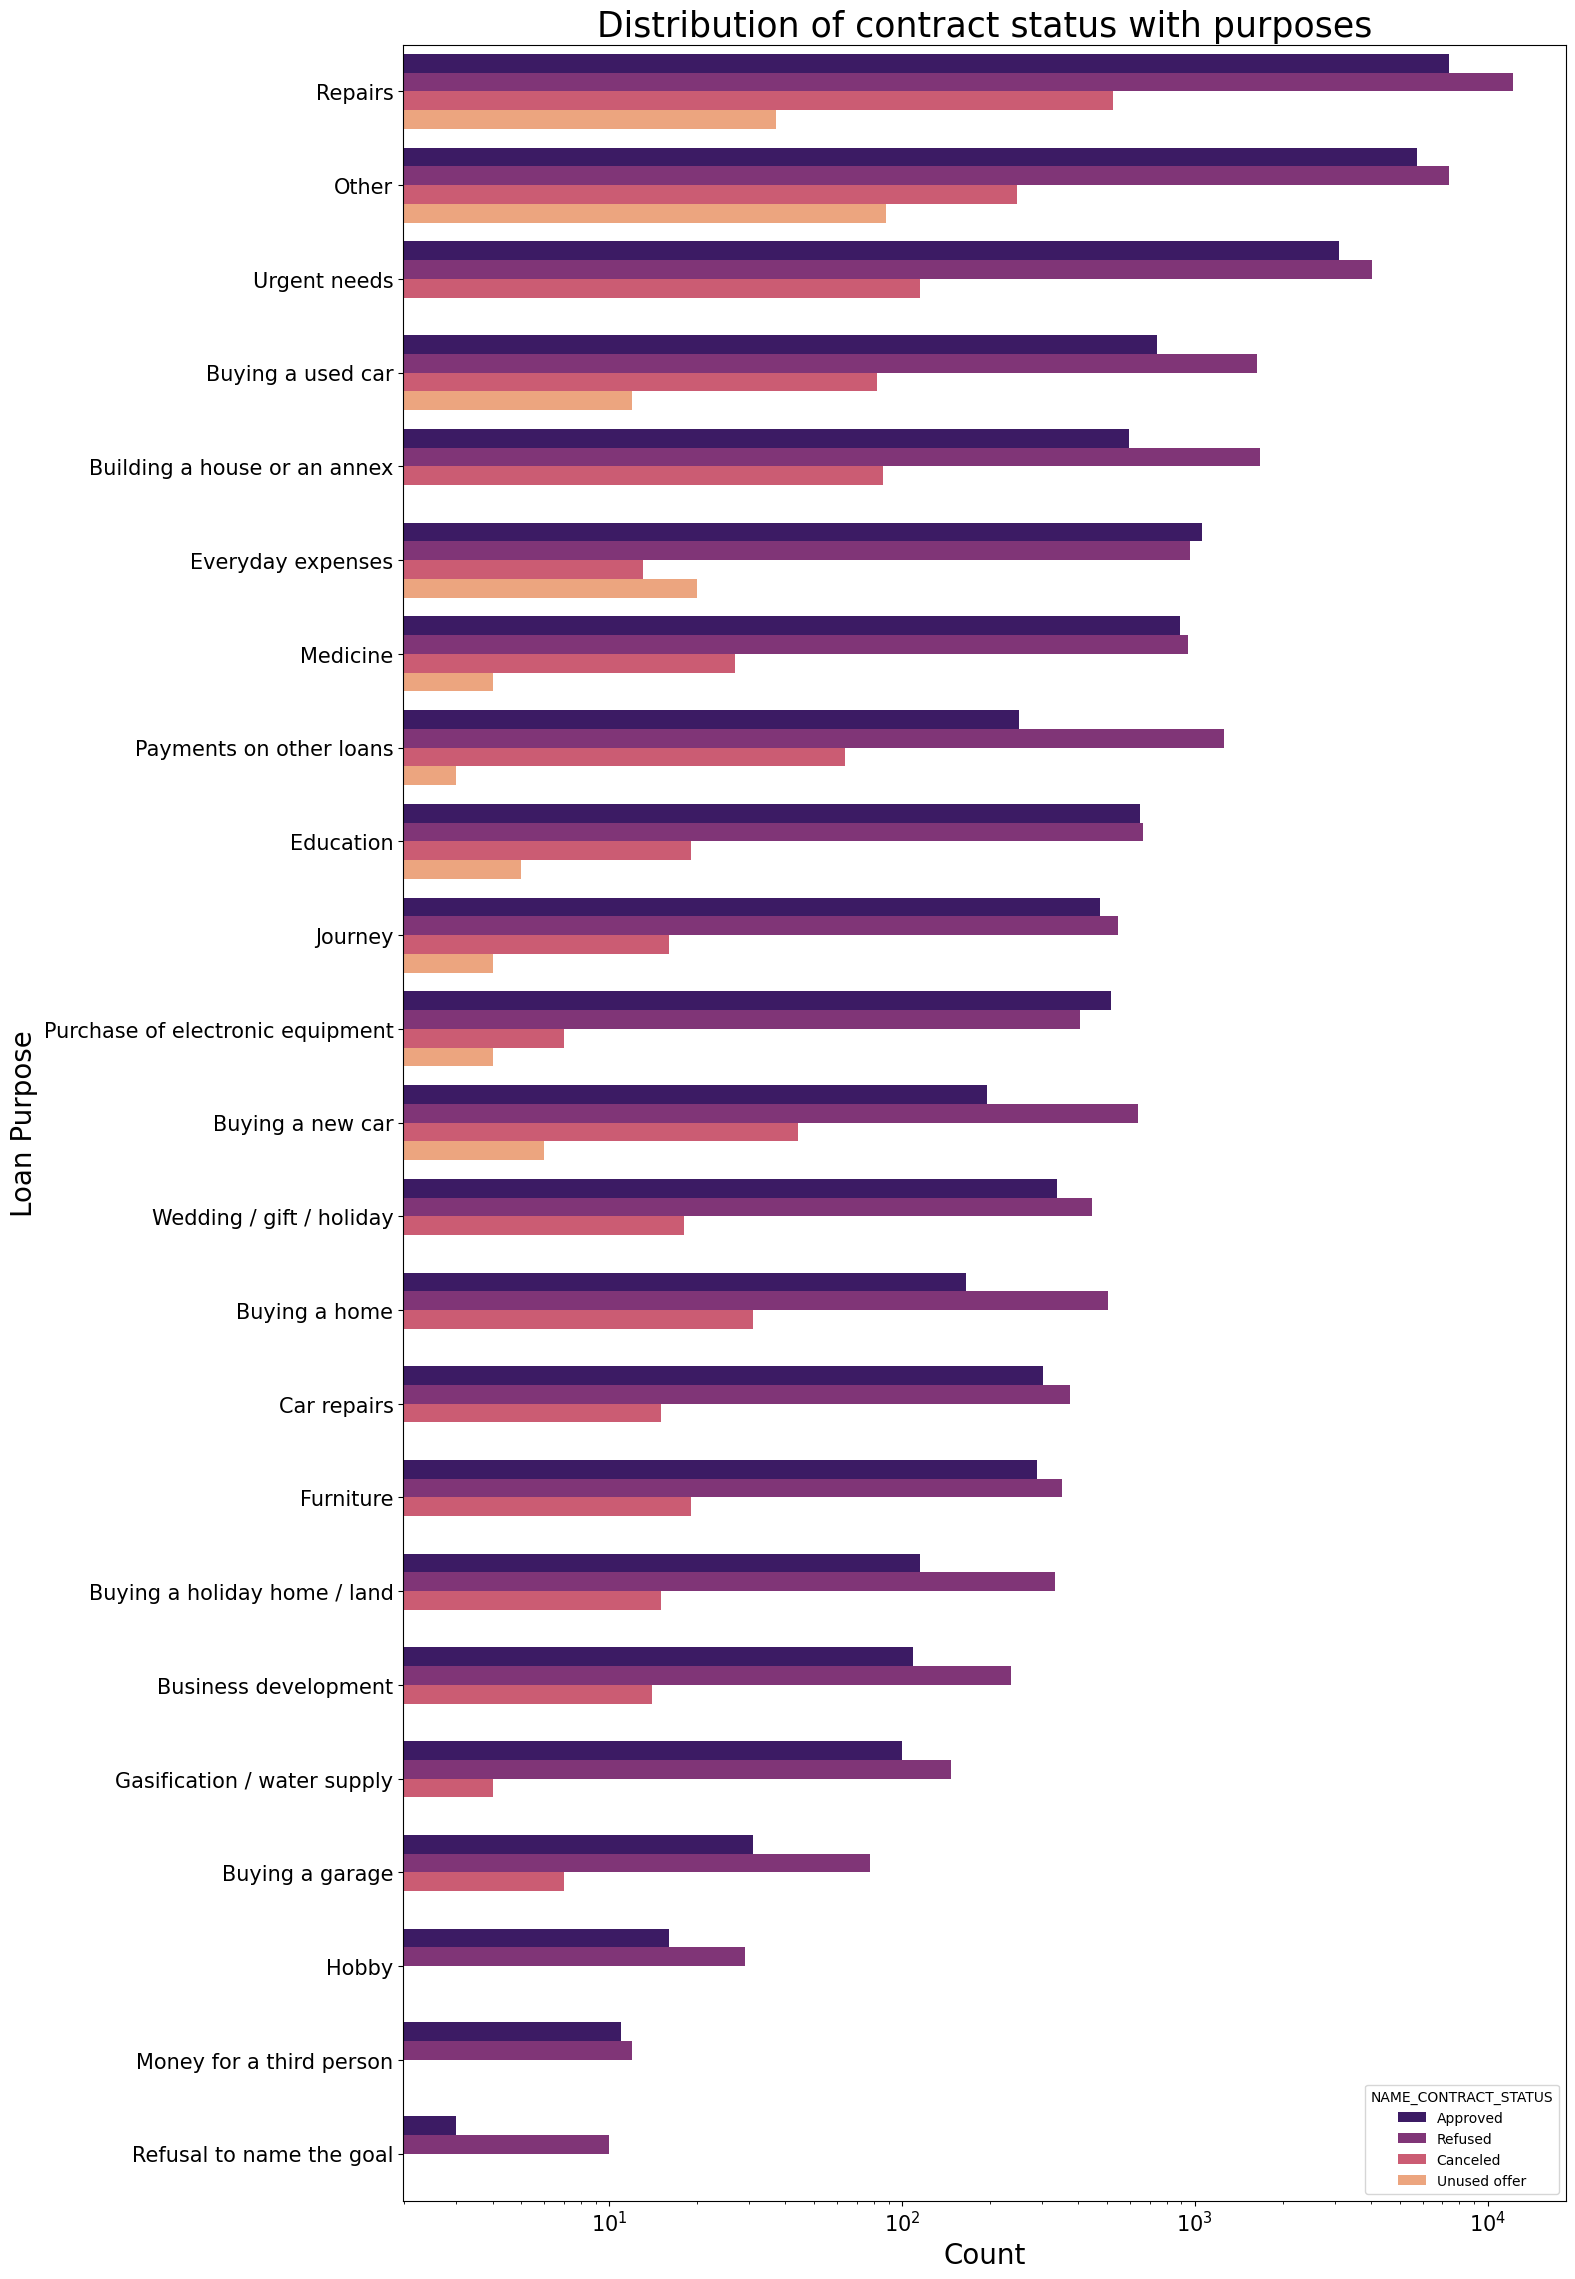

In [181]:
plt.figure(figsize=[15,28])

sns.countplot(data = merged_df, y  = 'NAME_CASH_LOAN_PURPOSE',order=merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue='NAME_CONTRACT_STATUS', palette='magma')

plt.title('Distribution of contract status with purposes', fontsize=25)

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.xlabel('Count', fontsize=20)

plt.ylabel('Loan Purpose', fontsize=20)

plt.xscale('log')

# The bar chart shows the distribution of loan purposes by contract status. "Repairs" and "urgent needs" have the highest counts of approved loans, while "business development" and "hobby" have the lowest. Overall, a significant number of loans are approved, with a noticeable number of cancellations across various purposes

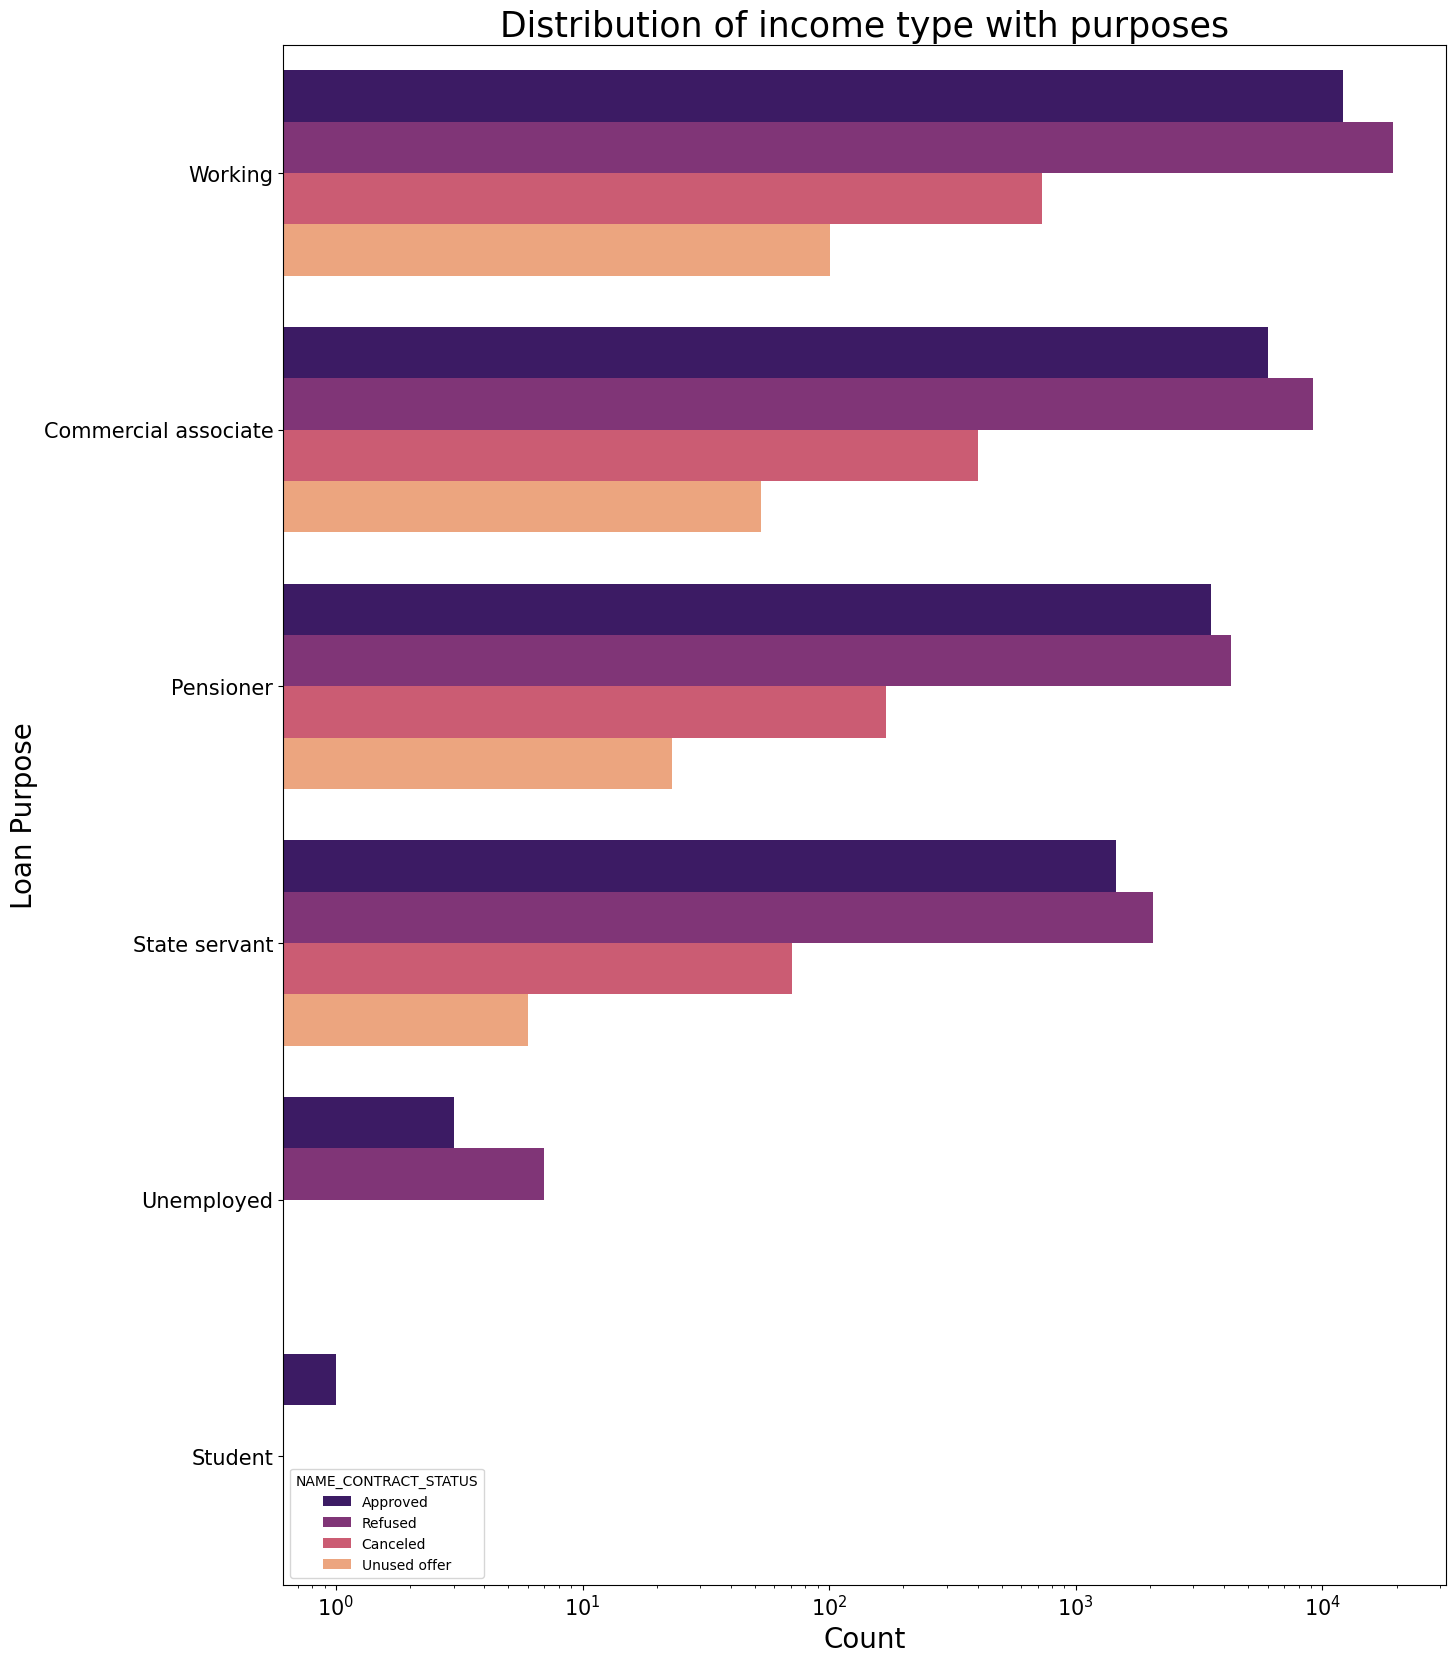

In [198]:
plt.figure(figsize=[15,20])

sns.countplot(data = merged_df, y  = 'NAME_INCOME_TYPE',order=merged_df['NAME_INCOME_TYPE'].value_counts().index, hue='NAME_CONTRACT_STATUS', palette='magma')

plt.title('Distribution of income type with purposes', fontsize=25)

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.xlabel('Count', fontsize=20)

plt.ylabel('Loan Purpose', fontsize=20)

plt.xscale('log')

## The chart displays loan purpose distributions across income statuses. "Working" borrowers have the highest number of approved loans, while "students" and "unemployed" show comparatively lower approval rates. Overall, most contracts are approved, but refusals and cancellations are notable, especially among lower-income borrowers.

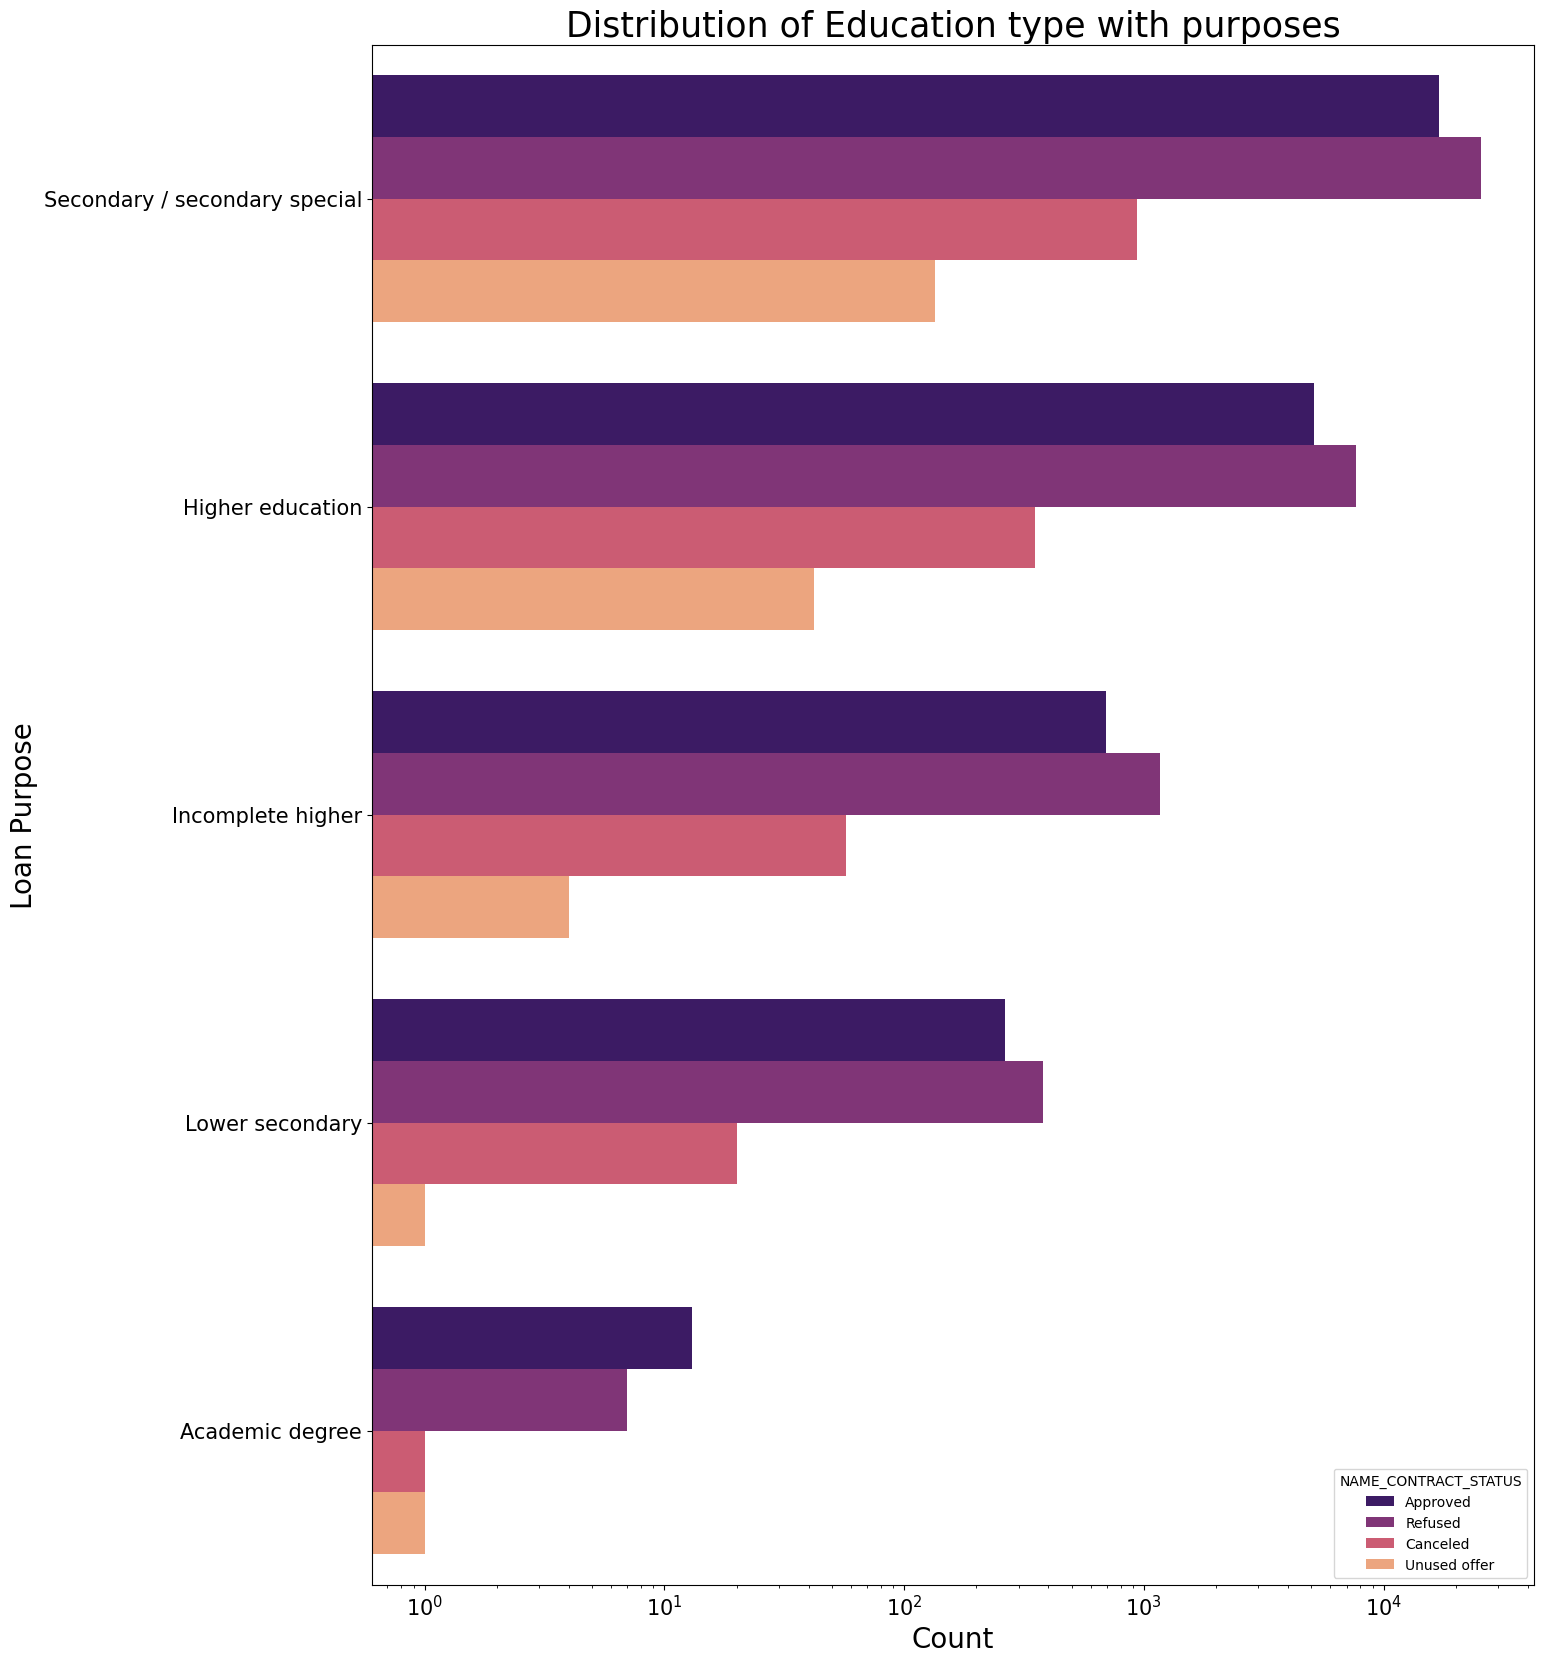

In [197]:
plt.figure(figsize=[15,20])

sns.countplot(data = merged_df, y  = 'NAME_EDUCATION_TYPE',order=merged_df['NAME_EDUCATION_TYPE'].value_counts().index, hue='NAME_CONTRACT_STATUS', palette='magma')

plt.title('Distribution of Education type with purposes', fontsize=25)

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.xlabel('Count', fontsize=20)

plt.ylabel('Loan Purpose', fontsize=20)

plt.xscale('log')

#### The chart illustrates the distribution of loan purposes by education status. "Secondary/special" and "higher education" loans have the highest approval rates, while "academic degree" and "incomplete higher" show more refusals and cancellations. Overall, most loans are approved, with noticeable cancellations across various education type

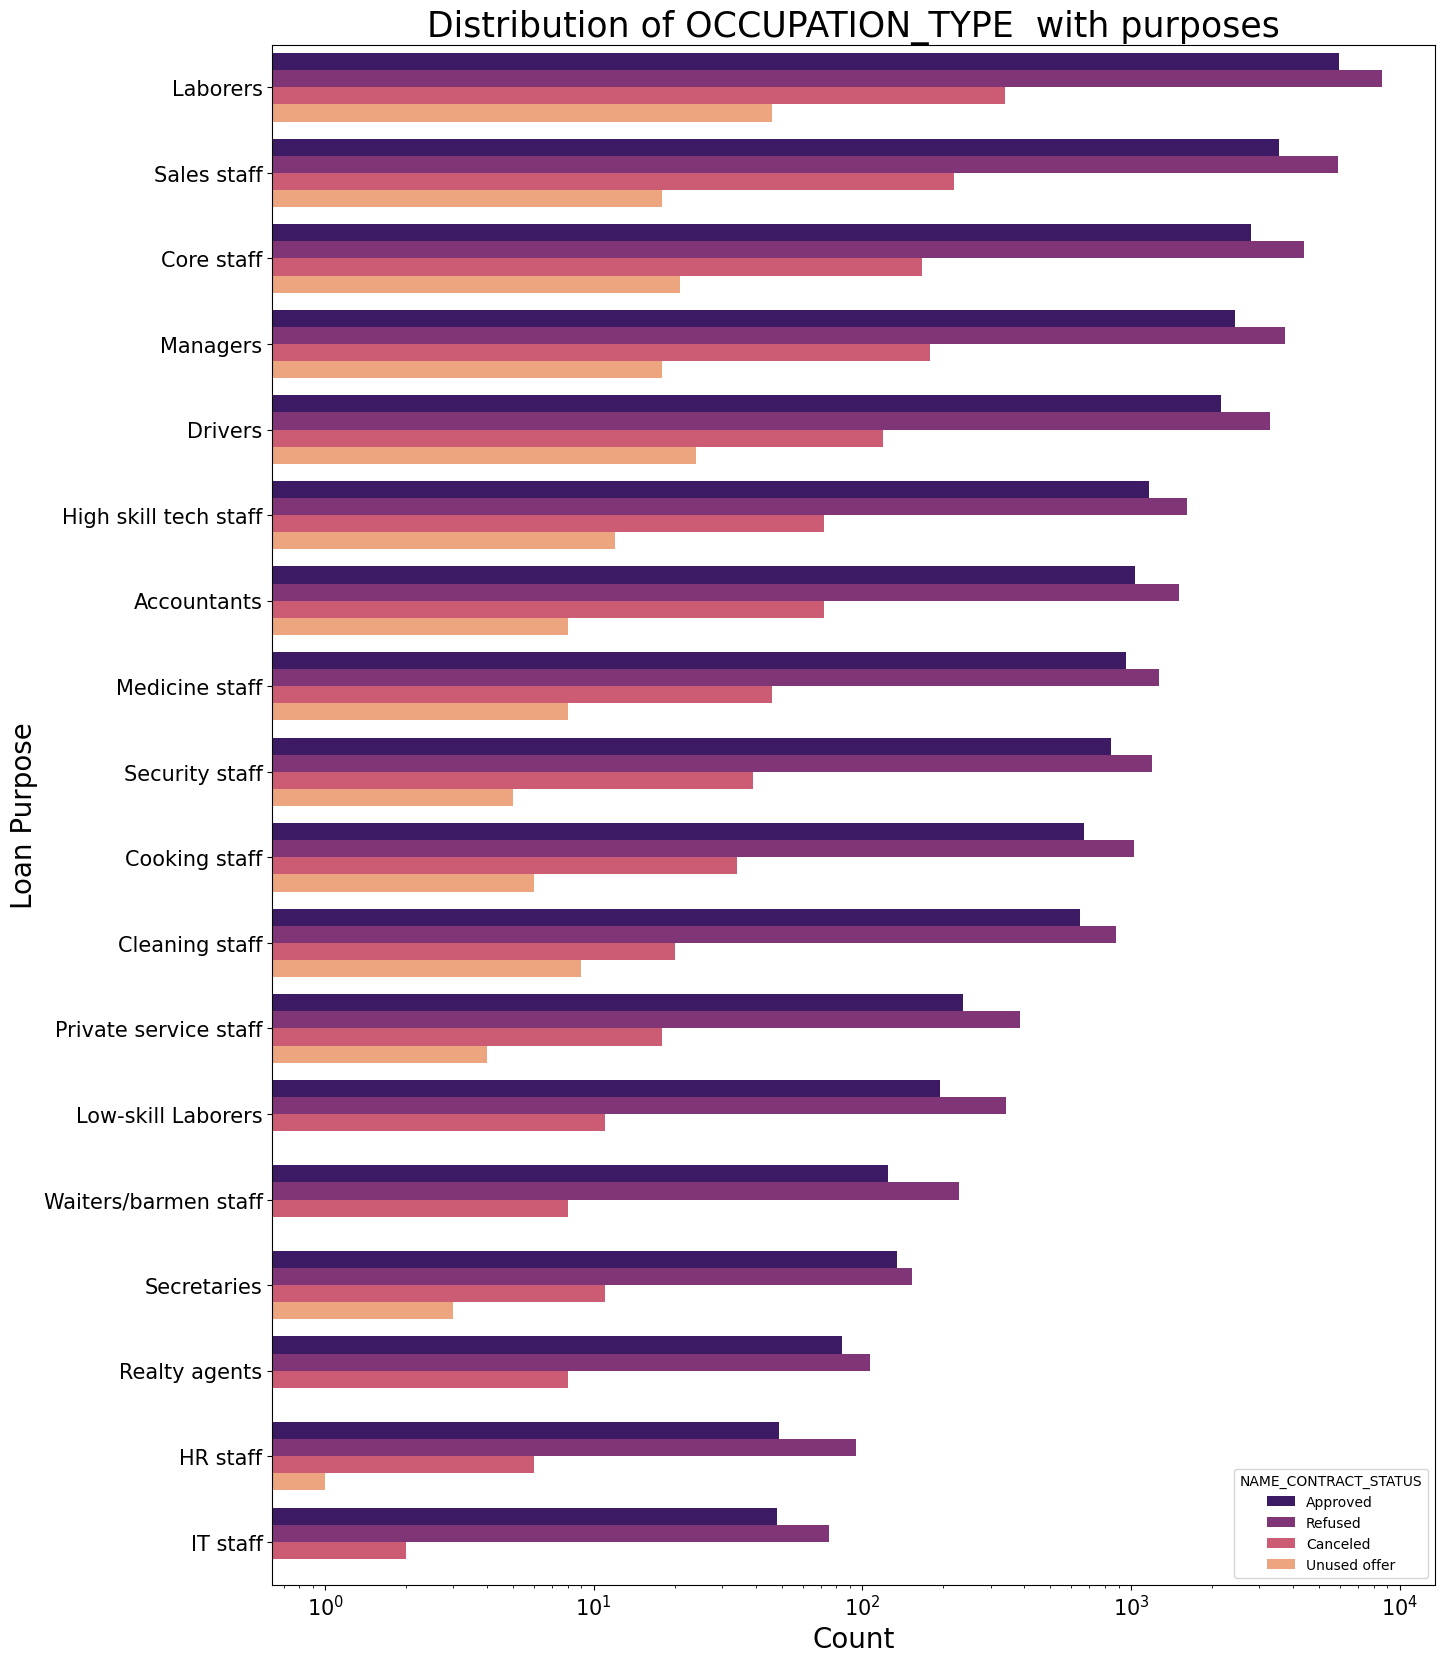

In [188]:
plt.figure(figsize=[15,20])

sns.countplot(data = merged_df, y  = 'OCCUPATION_TYPE',order=merged_df['OCCUPATION_TYPE'].value_counts().index, hue='NAME_CONTRACT_STATUS', palette='magma')

plt.title('Distribution of OCCUPATION_TYPE  with purposes', fontsize=25)

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.xlabel('Count', fontsize=20)

plt.ylabel('Loan Purpose', fontsize=20)

plt.xscale('log')

#### The chart shows loan distribution by occupation type and contract status. "Laborers" and "sales staff" have the highest number of approved loans, while categories like "IT staff" and "HR staff" display more refusals. Overall, approved loans dominate, with cancellations impacting several lower-skilled occupation

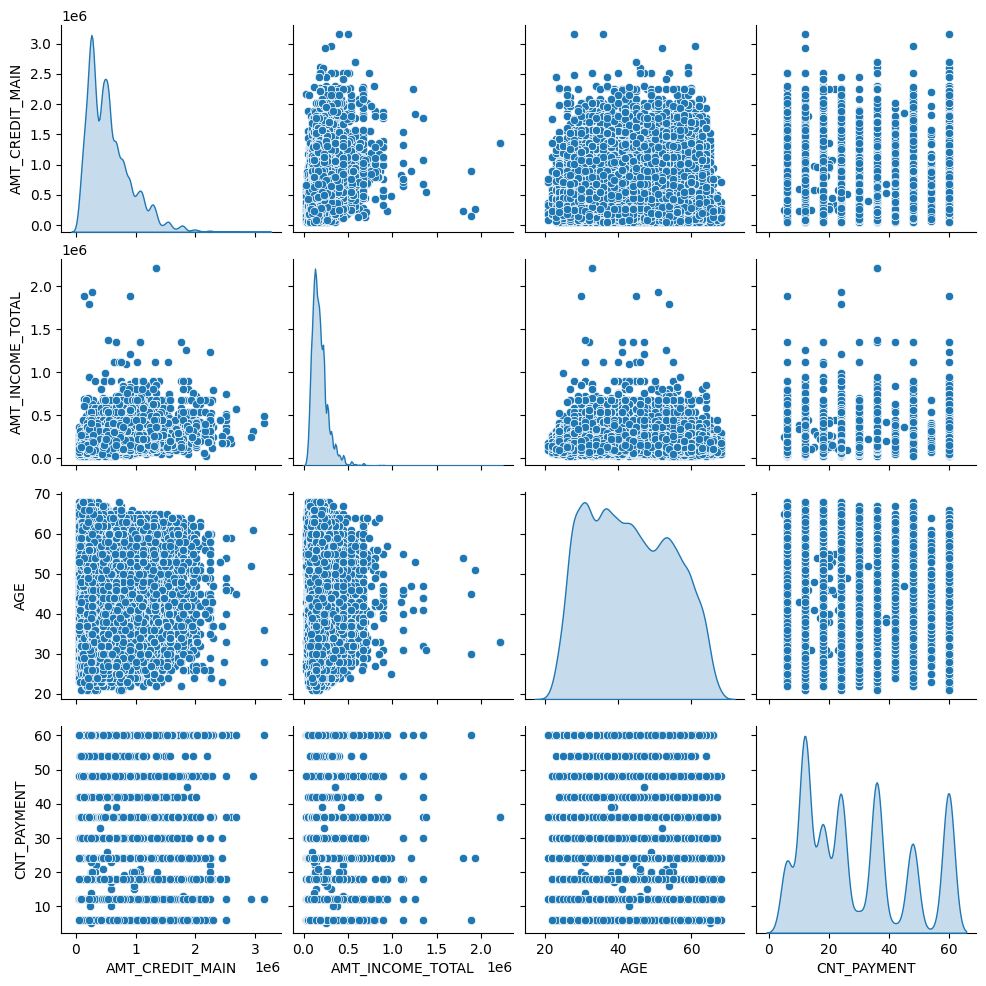

In [189]:
sns.pairplot(merged_df[['AMT_CREDIT_MAIN', 'AMT_INCOME_TOTAL', 'AGE', 'CNT_PAYMENT']], diag_kind='kde')
plt.show()


#### The scatterplot matrix illustrates relationships between variables like credit amount, total income, age, and payment count. Notable trends include a positive correlation between credit amount and total income, while age shows a varied distribution across different payment counts. Overall, the distributions highlight potential patterns in borrower behavior and financial status.



## creating two dataframe for visualizatioon


In [200]:
df_1 = merged_df[merged_df['TARGET'] == 1]
df_1.head()
df_0 = merged_df[merged_df['TARGET'] == 0]
df_0.head()

SK_ID_CURR  TARGET  AMT_CREDIT_MAIN  AMT_ANNUITY  AMT_GOODS_PRICE  \
99       100034       0         180000.0       9000.0         180000.0   
110      100035       0         665892.0      24592.5         477000.0   
136      100039       0         733315.5      39069.0         679500.0   
159      100046       0         540000.0      27000.0         540000.0   
160      100046       0         540000.0      27000.0         540000.0   

     AMT_INCOME_TOTAL CONTRACT_TYPE_MAIN CODE_GENDER FLAG_OWN_CAR  \
99            90000.0    Revolving loans           M            N   
110          292500.0         Cash loans           F            N   
136          360000.0         Cash loans           M            Y   
159          180000.0    Revolving loans           M            Y   
160          180000.0    Revolving loans           M            Y   

    FLAG_OWN_REALTY  CNT_CHILDREN      NAME_INCOME_TYPE  \
99                Y             0               Working   
110               Y             0  Commercial associate   
136               N             1  Commercial associate   
159               Y             0               Working   
160               Y             0               Working   

               NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
99                Higher education  Single / not married       With parents   
110  Secondary / secondary special        Civil marriage  House / apartment   
136  Secondary / secondary special               Married  House / apartment   
159               Higher education               Married  House / apartment   
160               Higher education               Married  House / apartment   

     REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  EXT_SOURCE_1  \
99                     0.030755      -10341          -1010      0.297914   
110                    0.025164      -15280          -2668      0.505998   
136                    0.015221      -11694          -2060      0.505998   
159                    0.025164      -16126          -1761      0.505998   
160                    0.025164      -16126          -1761      0.505998   

     EXT_SOURCE_2  EXT_SOURCE_3 OCCUPATION_TYPE  CNT_FAM_MEMBERS  AGE  \
99       0.502779      0.535276        Laborers              1.0   28   
110      0.479987      0.410103        Managers              2.0   41   
136      0.321745      0.411849         Drivers              3.0   32   
159      0.738053      0.605836        Managers              2.0   44   
160      0.738053      0.605836        Managers              2.0   44   

     LOAN_INCOME_RATIO CONTRACT_TYPE_PREV  AMT_APPLICATION  AMT_CREDIT_PREV  \
99            2.000000         Cash loans          94500.0         109971.0   
110           2.276554         Cash loans        1260000.0        1260000.0   
136           2.036987         Cash loans        1350000.0        1487214.0   
159           3.000000         Cash loans         337500.0         407911.5   
160           3.000000         Cash loans         450000.0         555723.0   

     AMT_DOWN_PAYMENT NAME_CONTRACT_STATUS  DAYS_DECISION  \
99                0.0             Approved           -599   
110               0.0              Refused           -119   
136               0.0             Approved           -695   
159               0.0             Approved           -539   
160               0.0              Refused           -449   

      NAME_CASH_LOAN_PURPOSE  CNT_PAYMENT  RATE_DOWN_PAYMENT  
99                     Other          6.0                0.0  
110  Payments on other loans         60.0                0.0  
136        Buying a used car         42.0                0.0  
159                  Repairs         18.0                0.0  
160                  Repairs         24.0                0.0

C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\2004259465.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\2004259465.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


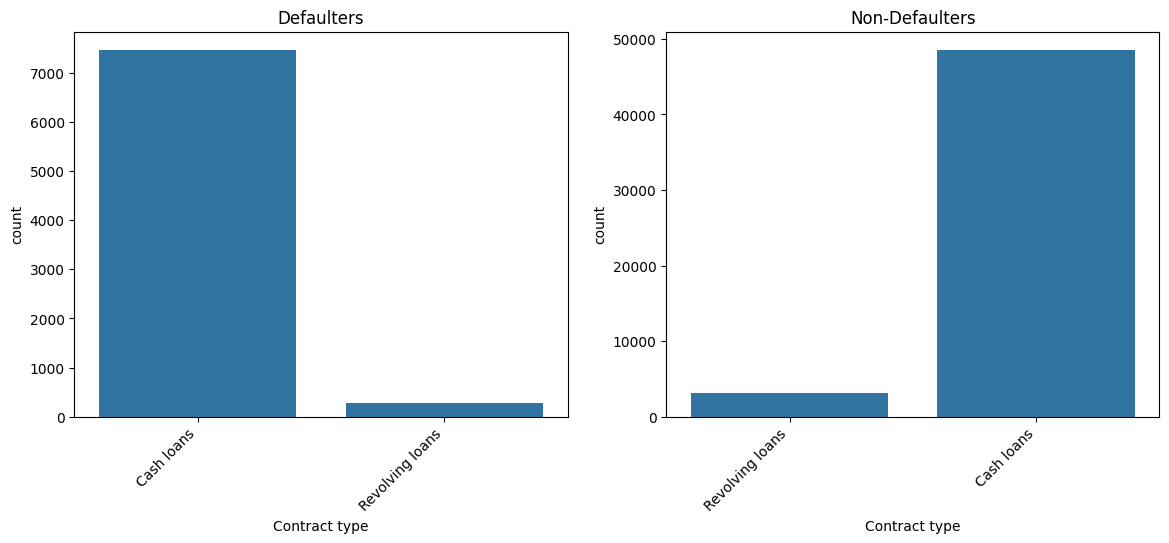

In [204]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CONTRACT_TYPE_MAIN',data=df_1)
plt.title('Defaulters')
ax.set(xlabel='Contract type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CONTRACT_TYPE_MAIN',data=df_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Contract type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

#### no relation found between contract type and defualters/non defaulters
#### no major difference

[Text(0.5, 0, 'Gender')]

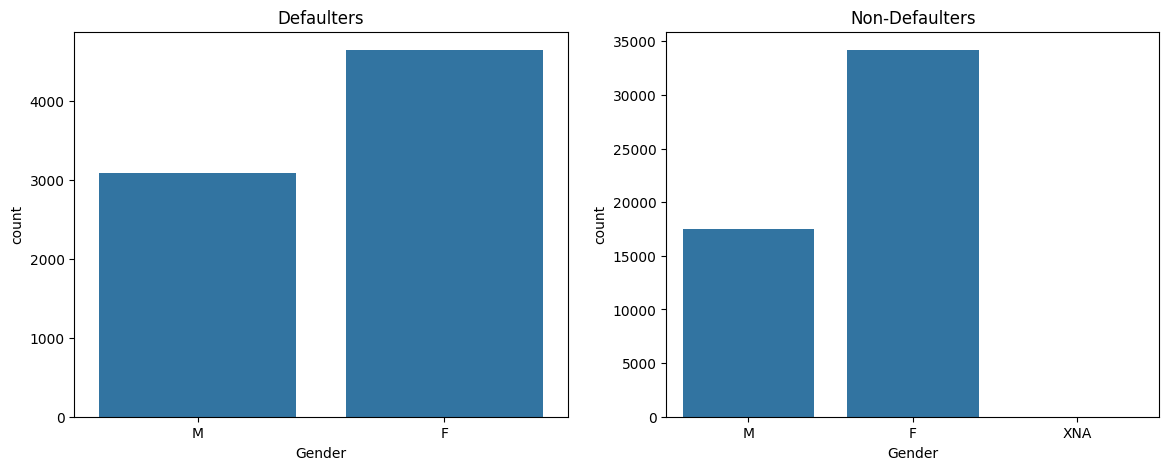

In [206]:
# Plotting two plots for delaulters and non defaulters on basis of gender
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CODE_GENDER',data=df_1)
plt.title('Defaulters')
ax.set(xlabel='Gender')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CODE_GENDER',data=df_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Gender')

#### Defaluters - We can see that females are slightly more in number of defaulters than male.
##### Non-defaluters - The same pattern continues for non-defaluters as well. The females are more in number here than male.

C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\3034550414.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\3034550414.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


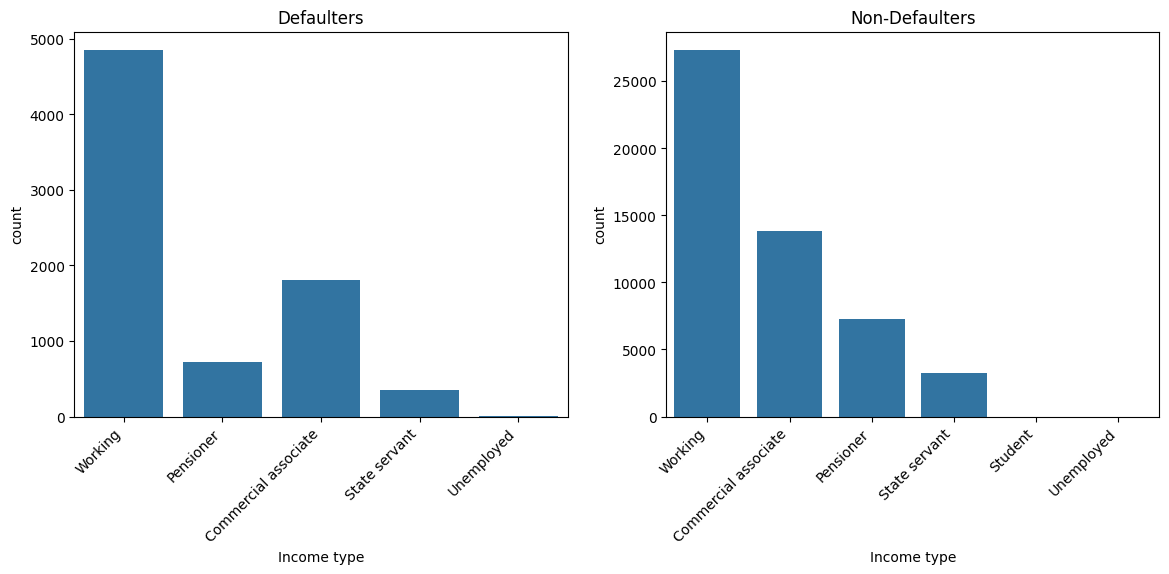

In [208]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_1)
plt.title('Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

##### Defaulters - Working people are mostly defaulted as their numbers are high with compare to other pfrofessions.
##### Non-defaulters - Similarly here also working people are more in number who are not defaulted.

C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\4182642423.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\4182642423.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


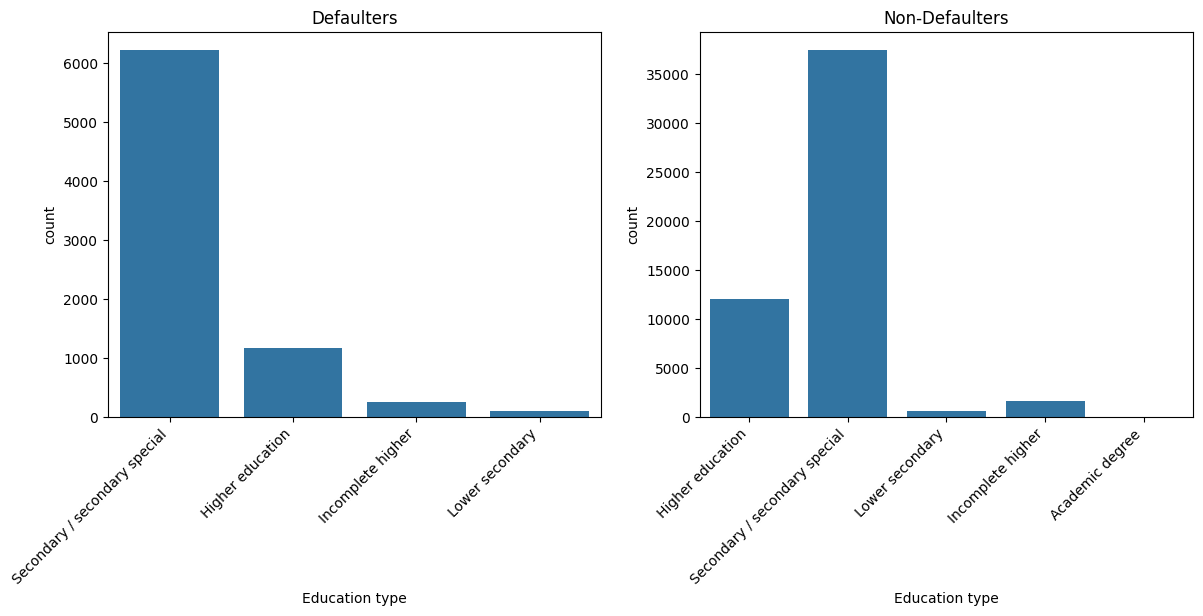

In [210]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_1)
plt.title('Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

##### Defaulters - Education with Secondary/Secondary sepcial customers are more number in defaulters comapre with other level of eduacted poeple.
##### Non defaulters - Here also Secondary/Secondary sepcial are more in numbers.

C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\76135921.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\76135921.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


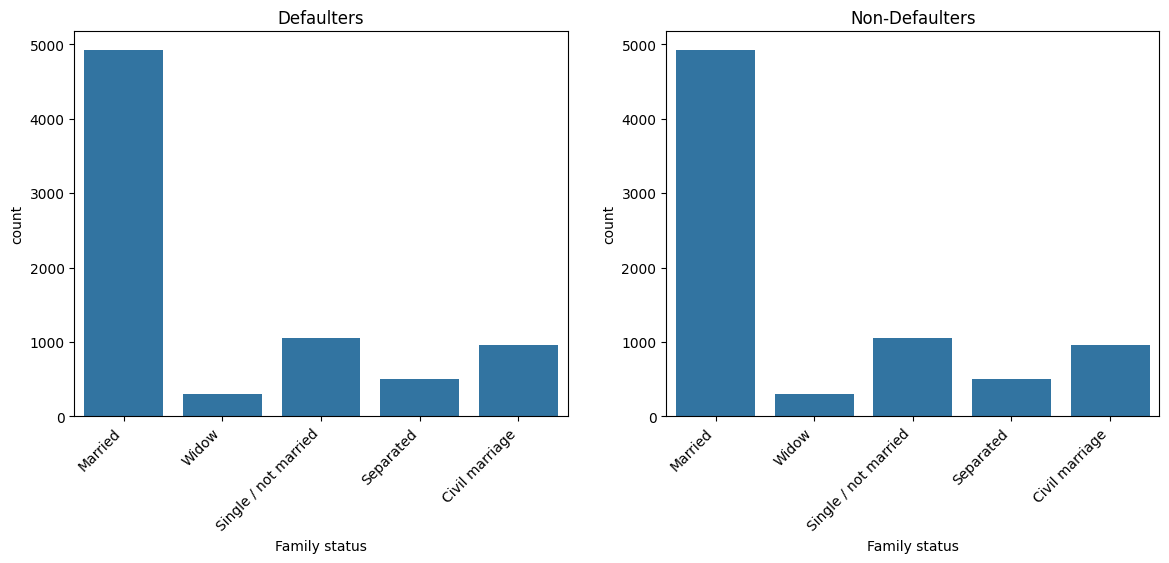

In [211]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df_1)
plt.title('Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df_1)
plt.title('Non-Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

##### For both the customers (defaulters and non-defaulters) married people are more in number comapred with single, separated, widow etc.

In [214]:
merged_df.columns

Index(['SK_ID_CURR', 'TARGET', 'AMT_CREDIT_MAIN', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'CONTRACT_TYPE_MAIN',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'AGE', 'LOAN_INCOME_RATIO',
       'CONTRACT_TYPE_PREV', 'AMT_APPLICATION', 'AMT_CREDIT_PREV',
       'AMT_DOWN_PAYMENT', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_CASH_LOAN_PURPOSE', 'CNT_PAYMENT', 'RATE_DOWN_PAYMENT'],
      dtype='object')

In [218]:
correlation = ['AMT_CREDIT_MAIN','AMT_ANNUITY','AMT_GOODS_PRICE','AGE']

In [219]:
df_corr_target_1 = df_1[correlation]
df_corr_target_1.head()

AMT_CREDIT_MAIN  AMT_ANNUITY  AMT_GOODS_PRICE  AGE
1237         571486.5      31131.0         454500.0   22
2301         450000.0      21888.0         450000.0   27
2307         450000.0      21888.0         450000.0   27
2311         450000.0      21888.0         450000.0   27
2313         450000.0      21888.0         450000.0   27

<Axes: >

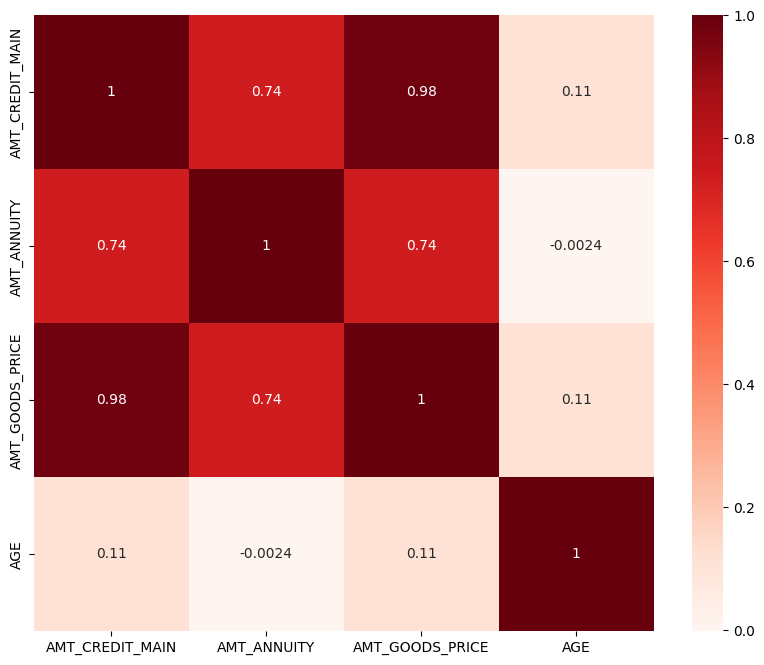

In [220]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_target_1.corr(),cmap="Reds",annot=True)

#### Good Correlation found
##### AMT_CREDIT and AMT_ANNUITY (0.84)
##### AMT_CREDIT and AMT_GOODS_PRICE (0.97)
##### AMT_ANNUITY and AMT_GOODS_PRICE (0.82)

In [222]:
df_corr_target_0 = df_0[correlation]

<Axes: >

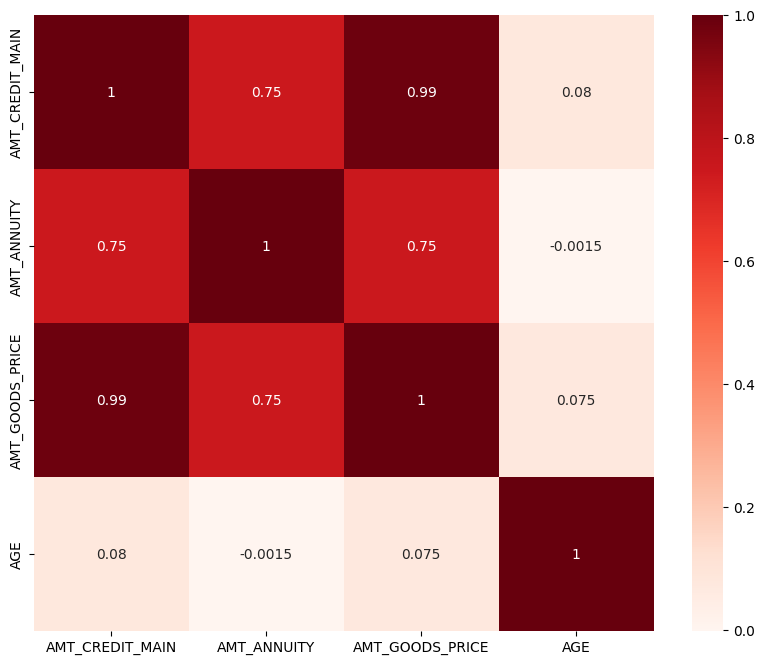

In [223]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_target_0.corr(),cmap="Reds",annot=True)

##### Conclusion - We can see that for both defaulters and non defaulters the same pairs of columns are highly corelated.

Text(0, 0.5, 'Current defaulters')

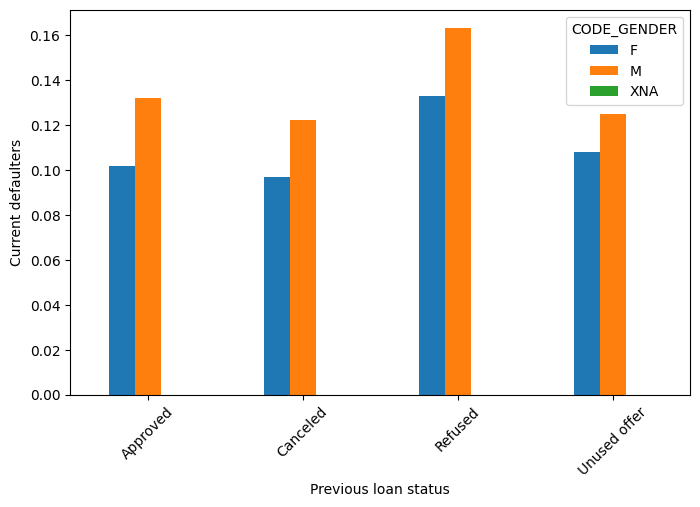

In [228]:
merged_df.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

#### Analysis
##### We see that previously Refused client is more defaulted than previously Approved clients. Also, in all the cases the Males are more defaulted than Females.

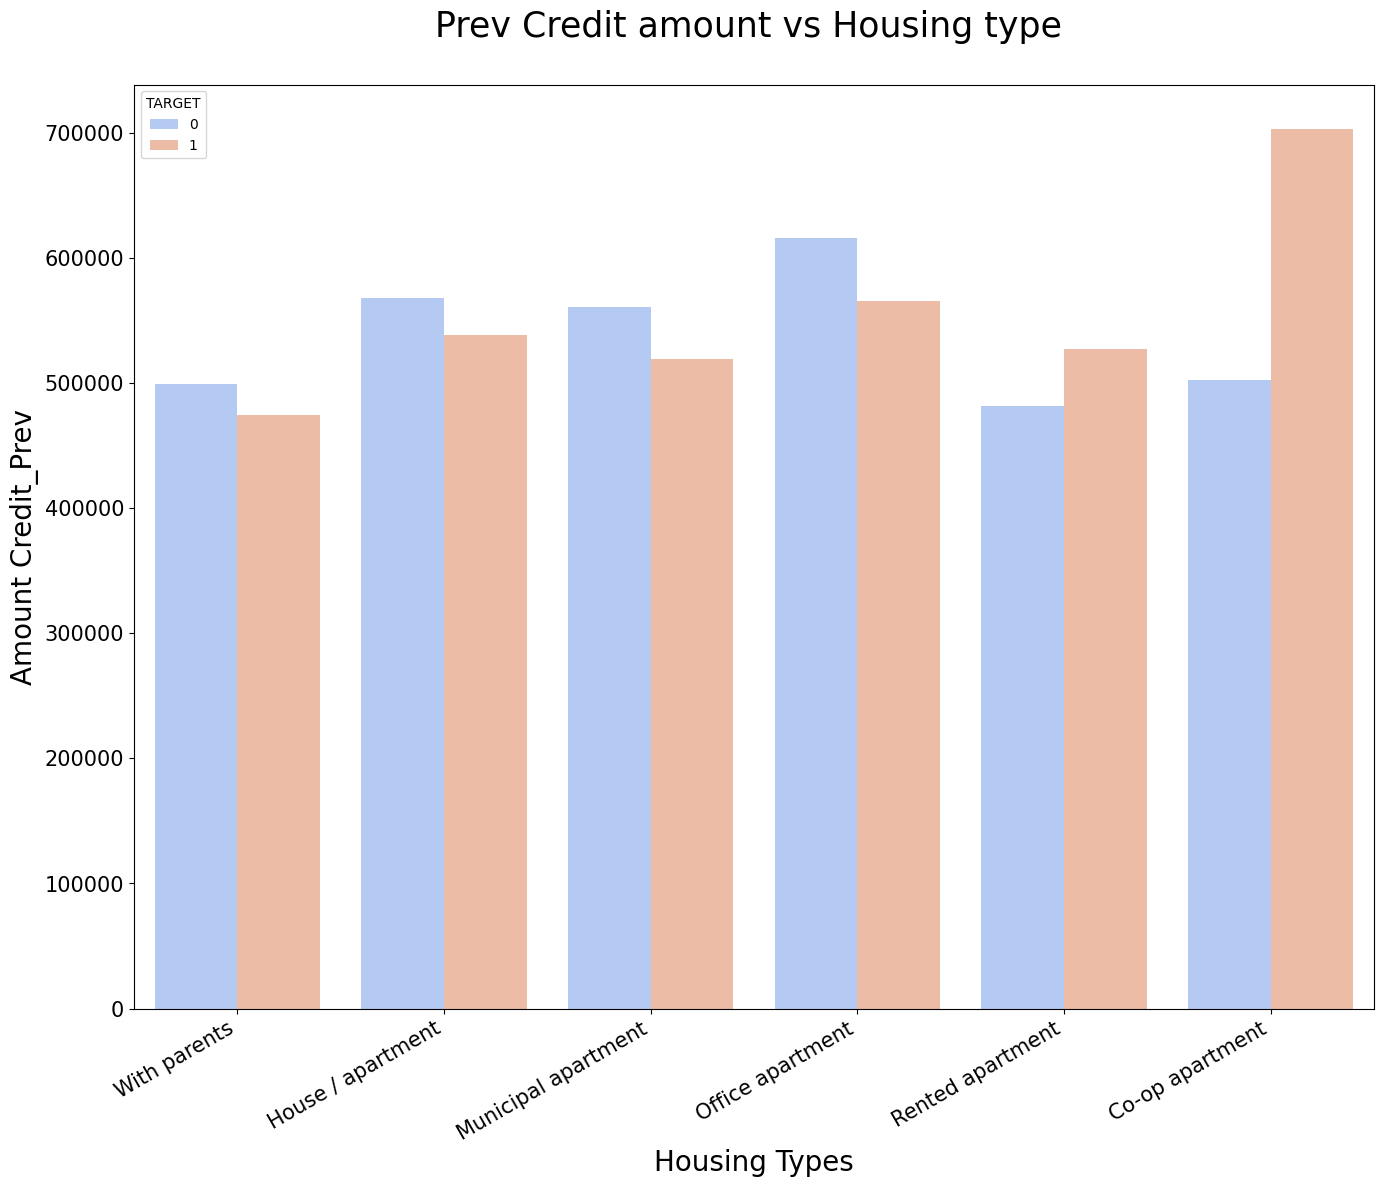

In [231]:
# Plotting for Credit amount prev vs Housing type,

plt.figure(figsize=(16,12))
plt.xticks(rotation=30)
sns.barplot(data =merged_df, y='AMT_CREDIT_MAIN',hue='TARGET',x='NAME_HOUSING_TYPE', palette='coolwarm', errorbar=None)
plt.title('Prev Credit amount vs Housing type \n', fontsize=25)
plt.ylabel('Amount Credit_Prev', fontsize=20)
plt.xlabel('Housing Types', fontsize=20)
plt.xticks(fontsize=15, ha='right')
plt.yticks(fontsize=15)

plt.show()

This chart suggests a significant difference in previous credit amounts based on housing types, with borrowers represented by TARGET = 0 generally experiencing higher credit amounts compared to those represented by TARGET = 1. Understanding these patterns can help lenders tailor their credit assessments and strategies based on housing conditions, potentially indicating a link between housing type and creditworthiness.

#  Abstract


This document outlines the critical columns to retain and discard in loan application datasets for effective analysis of loan default risk. It highlights essential data points, such as the target variable TARGET, various loan and applicant characteristics, and operational data indicators that help predict default likelihood. Conversely, it identifies columns of low predictive power or redundancy, such as various flag indicators and non-essential demographic information, which should be dropped to enhance model accuracy.

#  Key Points


-->The TARGET variable is crucial for determining loan default status in the application dataset.

-->Key financial indicators include AMT_CREDIT, AMT_ANNUITY, and AMT_INCOME_TOTAL to assess loan affordability and repayment capacity.

-->Demographic details like CODE_GENDER and NAME_FAMILY_STATUS can provide insights into the risk profile of applicants.

-->Additional important indicators such as LOAN_INCOME_RATIO are calculated to understand the relationship between loan amount and income.

-->Redundant columns like FLAG_MOBIL and documents flags should be removed as they contribute little to predictive analysis.

-->In the previous_application dataset, relevant historical data includes loan types, statuses, and payment details, linking to the main application dataset.

-->Columns with excessive missing values, such as DAYS_FIRST_DRAWING, should be dropped as they do not add significant predictive value.

# 1.Age

##### Younger Borrowers: Typically have higher default rates due to limited credit history and experience managing finances.

##### Older Borrowers: Often benefit from more stable income and better credit histories, leading to lower default rates.

#  2.Gender

Studies show that gender may impact the behavior of borrowers, with some analyses suggesting that female borrowers may have lower default rates due to more conservative financial behavior, though this can vary by region and cultural context.

#  3.Income Lebvel

Higher income levels generally correlate with lower default rates, as borrowers with stable and sufficient income are more likely to meet loan obligations. Low-income borrowers often face financial strain, increasing default risk.

#  4.Marital Status

Married individuals may have lower default rates due to combined financial resources and shared economic responsibilities. In contrast, single or divorced individuals may face more financial challenges.

#  5.Employment Status

Individuals with stable, full-time employment typically have lower default rates compared to those in part-time or unstable employment situations. Job security plays a crucial role in financial stability.

#  6.Educational Level

Higher education levels are often associated with better job prospects and higher income, reducing default risk. Conversely, lower education levels may correlate with unstable employment and higher default rates

#  7. Race and Ethnicity


Demographic disparities in loan default rates can sometimes reflect broader socioeconomic challenges, such as access to quality jobs and differences in wealth accumulation across various raciato reduce default rates.

##

## Conclusion

Loan purposes such as repairs and urgent needs are prevalent among both low-income and high-default borrowers. Additionally, while approved loans dominate the distribution, there are notable refusals and cancellations, especially in lower-skilled occupations and among younger borrowers. Overall, these findings suggest that income stability and occupation type are critical factors influencing loan approval and repayment success. Strategies to enhance borrower support, particularly for vulnerable groups, could mitigate risk and improve financial outcome

 Understanding these relationships can help lenders make more informed decisions and create targeted interventions to reduce default rates.

 